## Prerequisites


In [1]:
import dotenv

dotenv.load_dotenv()

True

In [2]:
project_names = [
    "gender_female",
    "gender_male",
    "language_de",
    "language_en",
    "language_es",
    "language_fr",
    "language_it",
    "language_ja",
    "language_pt",
]
encoder_ids = [
    ("mert_v1_95m", 768),
    ("whisper_large_v2", 1280),
    ("muq_large_msd", 1024),
    ("muq_mulan_large", 512),
]


## 1. Create CAVs using LogisticRegression for Significance Test


In [3]:
# training meta parameters
num_train_runs = 500
training_sample_frac = 0.25

### Prepare Data


In [4]:
import itertools
import os
import sys

import s3fs
from cavmir.utils import (
    create_in_memory_test_dataloader,
    lda_one_cav,
    load_df_and_embeddings,
    store_cav_vector_array,
    store_evaluation_metrics,
    train_one_cav,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training


In [5]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    test_dataloader = create_in_memory_test_dataloader(df_test)

    training_sample_size = int(len(df) * training_sample_frac)
    print(f"Training sample size: {training_sample_size}")

    cav_vectors = []
    evaluation_metrics = []

    for i in range(num_train_runs):
        sys.stdout.write(f"\rIteration {i + 1}/{num_train_runs}")

        cav_vector, evaluation_metric = lda_one_cav(
            random_state=i,
            df=df,
            project_name=project_name,
            training_sample_size=training_sample_size,
            embedding_dim=embedding_dim,
            test_dataloader=test_dataloader,
            plot_evaluation=False,
        )

        cav_vectors.append(cav_vector)
        evaluation_metrics.append(evaluation_metric)

    store_cav_vector_array(
        cav_vectors, f"cav_ttest_{project_name}.npy", encoder_id, project_name
    )
    store_evaluation_metrics(
        evaluation_metrics,
        f"evaluation_metrics_ttest_{project_name}.json",
        encoder_id,
        project_name,
    )



Fitting project: gender_female for encoder: mert_v1_95m
Training sample size: 548
Iteration 500/500
Fitting project: gender_female for encoder: whisper_large_v2
Training sample size: 548
Iteration 500/500
Fitting project: gender_female for encoder: muq_large_msd
Training sample size: 548
Iteration 500/500
Fitting project: gender_female for encoder: muq_mulan_large
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: mert_v1_95m
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: whisper_large_v2
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: muq_large_msd
Training sample size: 548
Iteration 500/500
Fitting project: gender_male for encoder: muq_mulan_large
Training sample size: 548
Iteration 500/500
Fitting project: language_de for encoder: mert_v1_95m
Training sample size: 106
Iteration 500/500
Fitting project: language_de for encoder: whisper_large_v2
Training sample size: 106
It

## 2. Train CAV for Qualitative Tests


In [6]:
train_val_split = 0.9

# training parameters
epochs = 10000
learning_rate = 0.004
dropout_rate = 0.0

### Prepare Data


In [7]:
import itertools
import os

import s3fs
from cavmir.utils import (
    store_cav_vector_array,
    store_evaluation_metrics,
    train_one_cav,
    load_df_and_embeddings,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


### Training



Fitting project: gender_female for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6980
Epoch 1 Validation Loss: 0.6917
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4073
Epoch 101 Validation Loss: 0.4180
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3423
Epoch 201 Validation Loss: 0.3777
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3093
Epoch 301 Validation Loss: 0.3622
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2878
Epoch 401 Validation Loss: 0.3538
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2718
Epoch 501 Validation Loss: 0.3487
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2590
Epoch 601 Validation Loss: 0.3456
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/10000
Ep

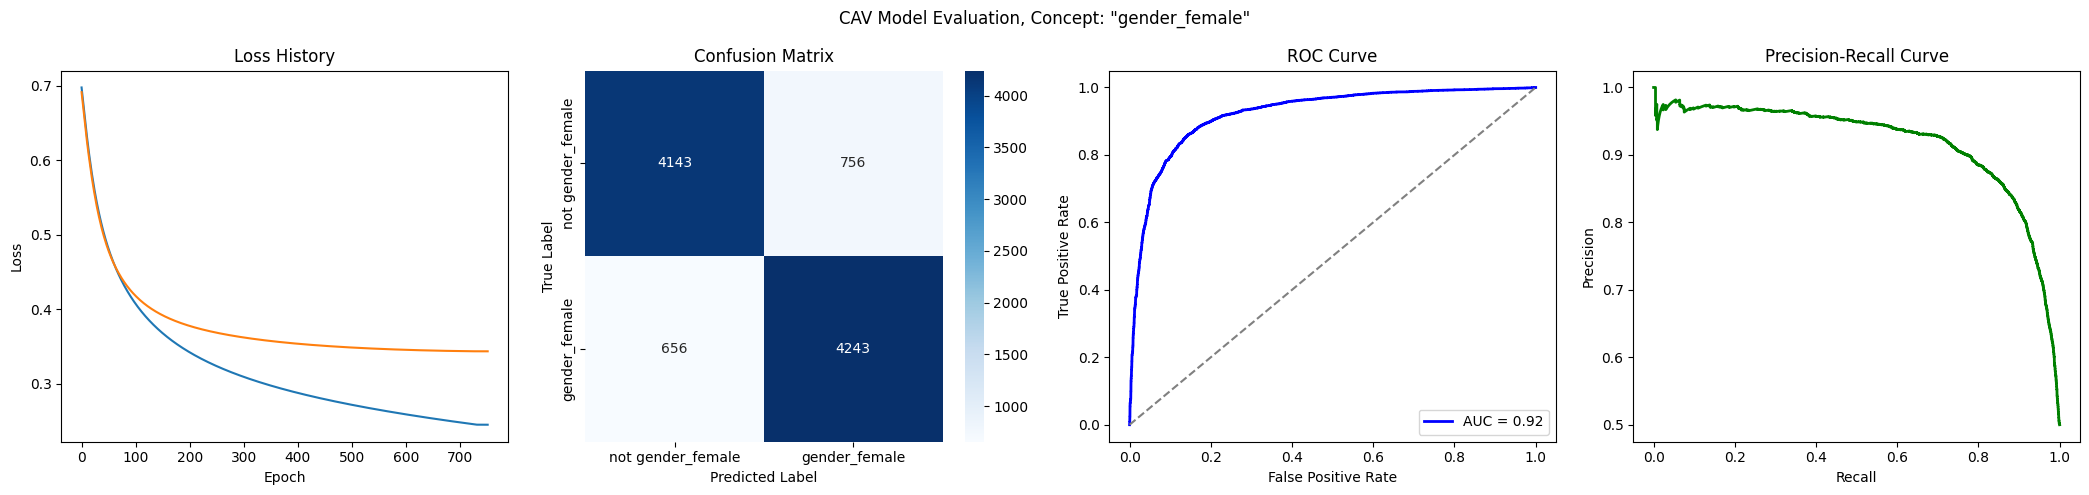


Fitting project: gender_female for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6934
Epoch 1 Validation Loss: 0.7079
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4593
Epoch 101 Validation Loss: 0.4715
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3596
Epoch 201 Validation Loss: 0.3803
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3048
Epoch 301 Validation Loss: 0.3364
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2692
Epoch 401 Validation Loss: 0.3116
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2435
Epoch 501 Validation Loss: 0.2963
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2234
Epoch 601 Validation Loss: 0.2866
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/100

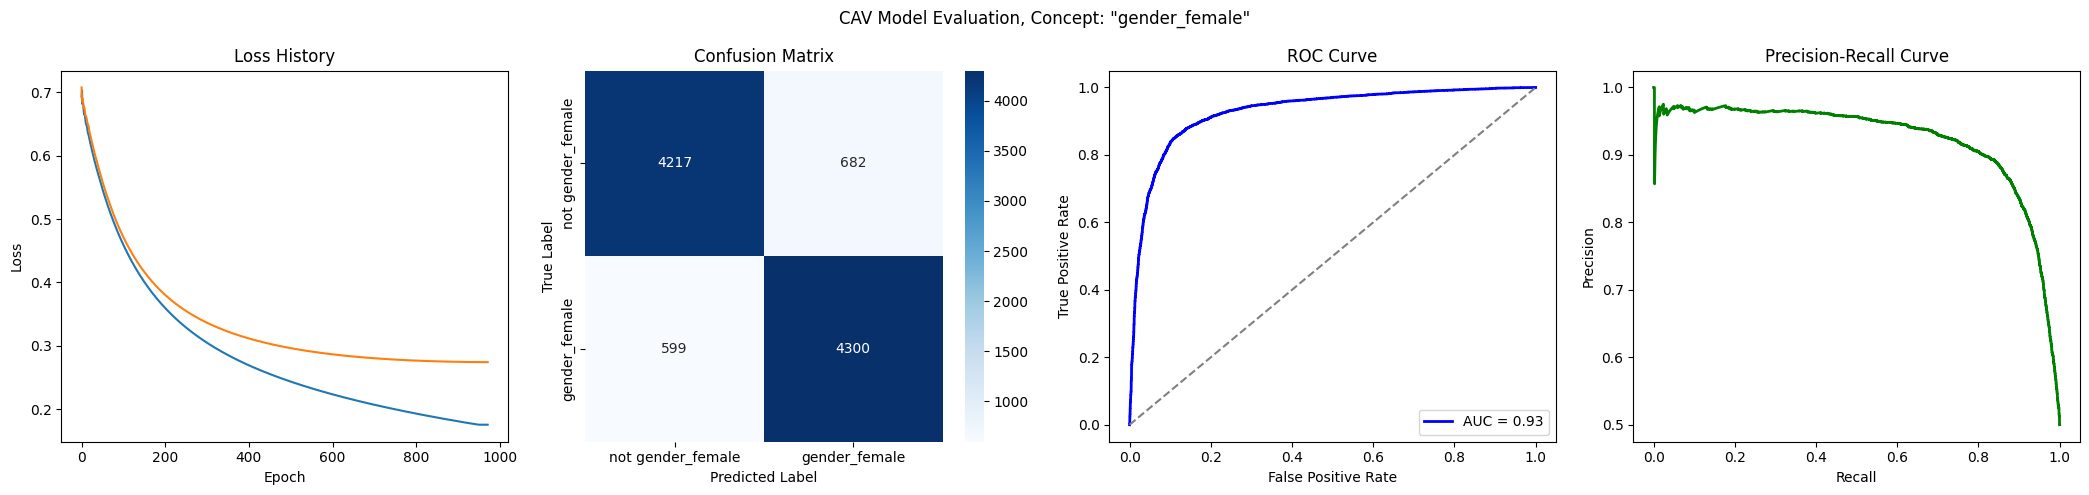


Fitting project: gender_female for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6998
Epoch 1 Validation Loss: 0.6806
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2811
Epoch 101 Validation Loss: 0.3000
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.2413
Epoch 201 Validation Loss: 0.2833
Model saved to trainings/gender_female/state_dict.pth
Early stopping at epoch 246
Loss history saved to trainings/gender_female/loss_history.json


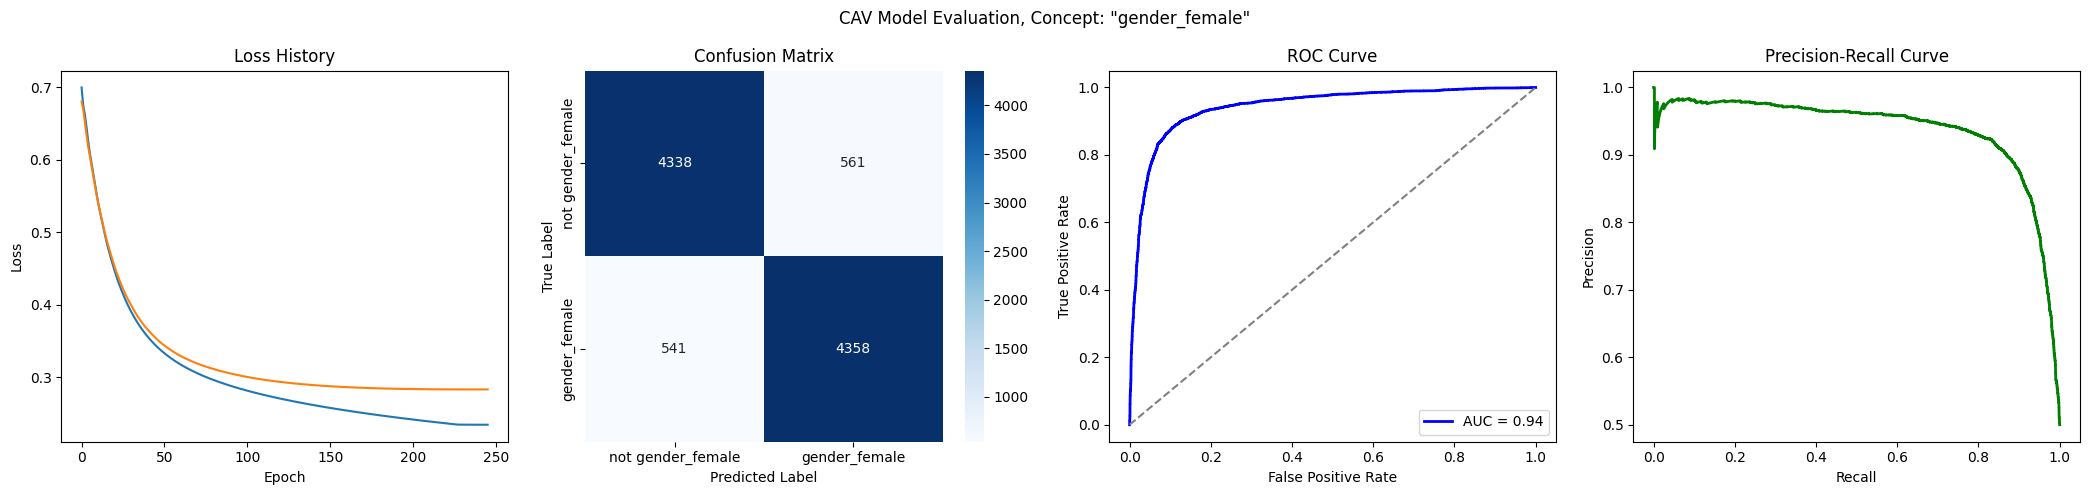


Fitting project: gender_female for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6937
Epoch 1 Validation Loss: 0.6915
Model saved to trainings/gender_female/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.6110
Epoch 101 Validation Loss: 0.6212
Model saved to trainings/gender_female/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5868
Epoch 201 Validation Loss: 0.6047
Model saved to trainings/gender_female/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5717
Epoch 301 Validation Loss: 0.5964
Model saved to trainings/gender_female/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5599
Epoch 401 Validation Loss: 0.5902
Model saved to trainings/gender_female/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5499
Epoch 501 Validation Loss: 0.5845
Model saved to trainings/gender_female/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5409
Epoch 601 Validation Loss: 0.5787
Model saved to trainings/gender_female/state_dict.pth
Epoch 701/1000

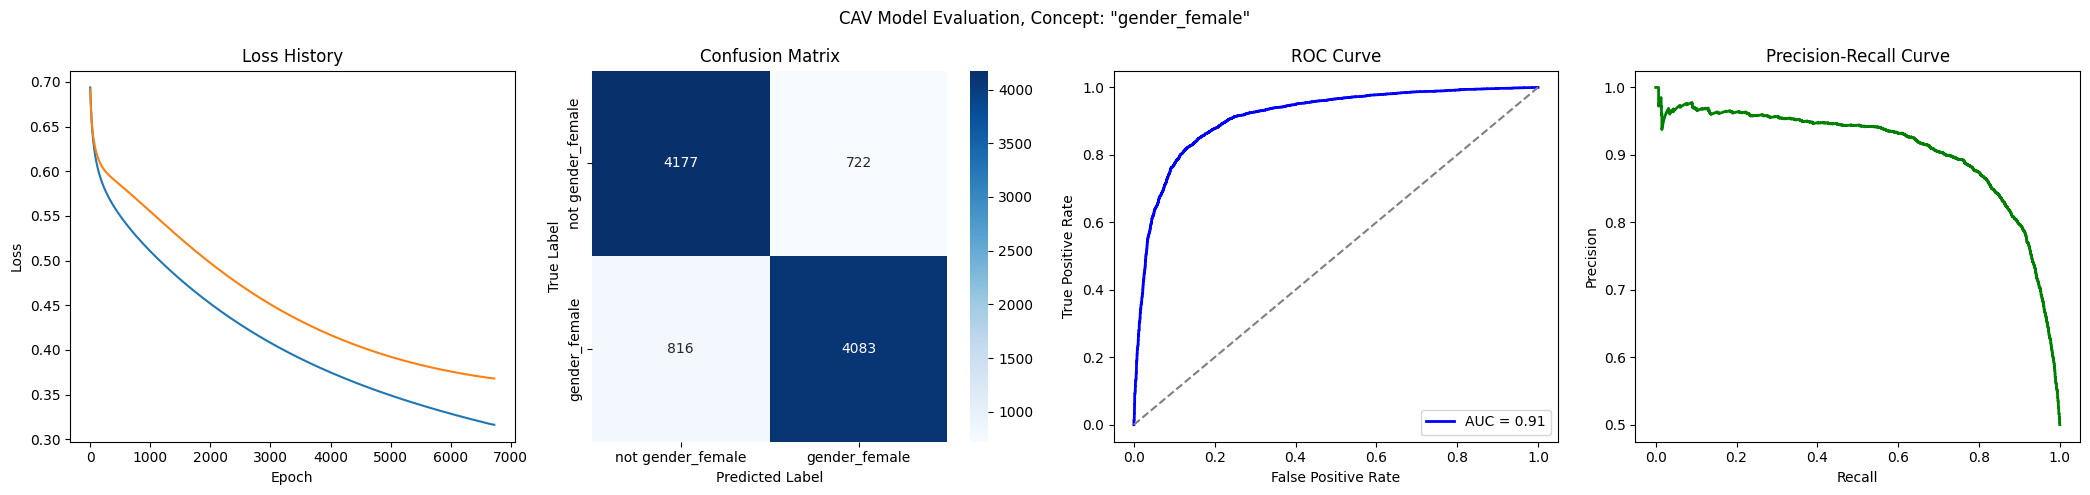


Fitting project: gender_male for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6968
Epoch 1 Validation Loss: 0.6928
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4062
Epoch 101 Validation Loss: 0.4072
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3440
Epoch 201 Validation Loss: 0.3568
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3109
Epoch 301 Validation Loss: 0.3402
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2883
Epoch 401 Validation Loss: 0.3357
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 427
Loss history saved to trainings/gender_male/loss_history.json


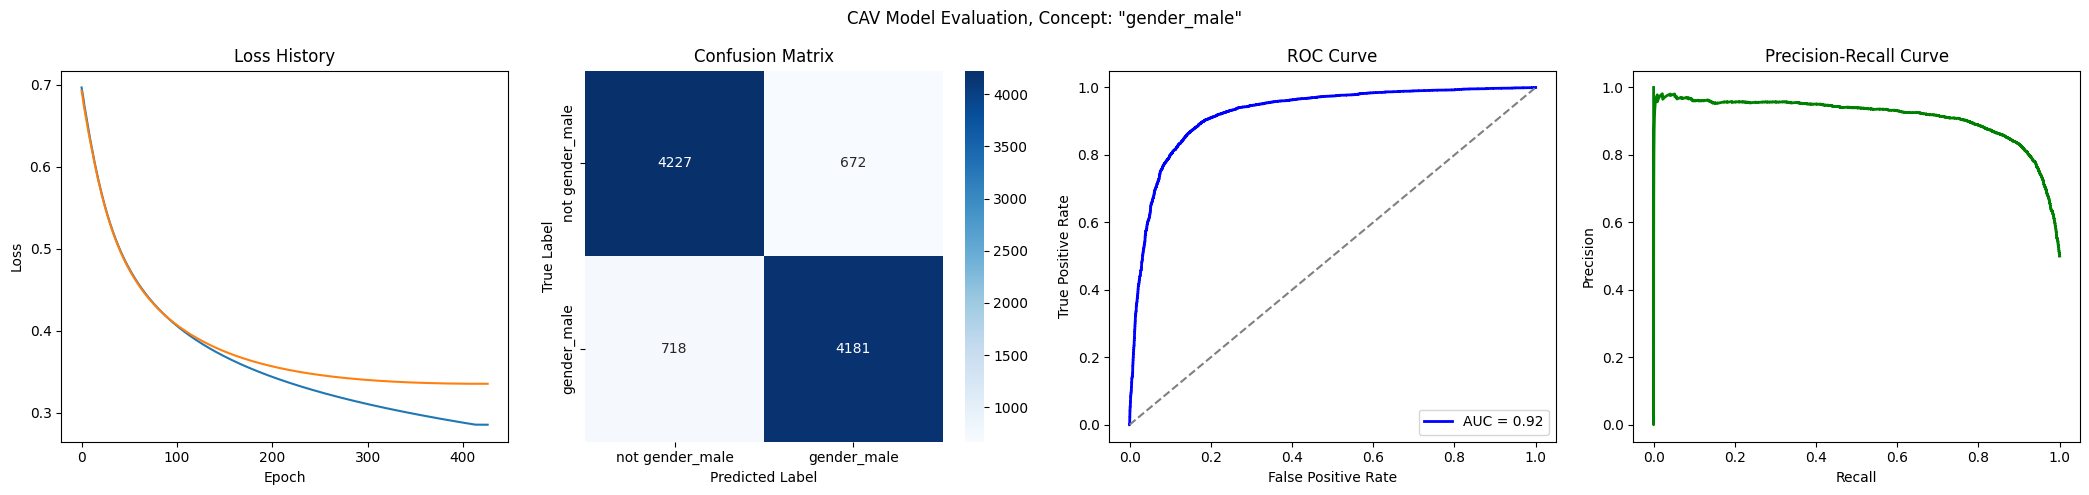


Fitting project: gender_male for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6956
Epoch 1 Validation Loss: 0.7045
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4452
Epoch 101 Validation Loss: 0.4982
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.3485
Epoch 201 Validation Loss: 0.4145
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.2958
Epoch 301 Validation Loss: 0.3768
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.2615
Epoch 401 Validation Loss: 0.3587
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.2363
Epoch 501 Validation Loss: 0.3506
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.2181
Epoch 601 Validation Loss: 0.3483
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 609
L

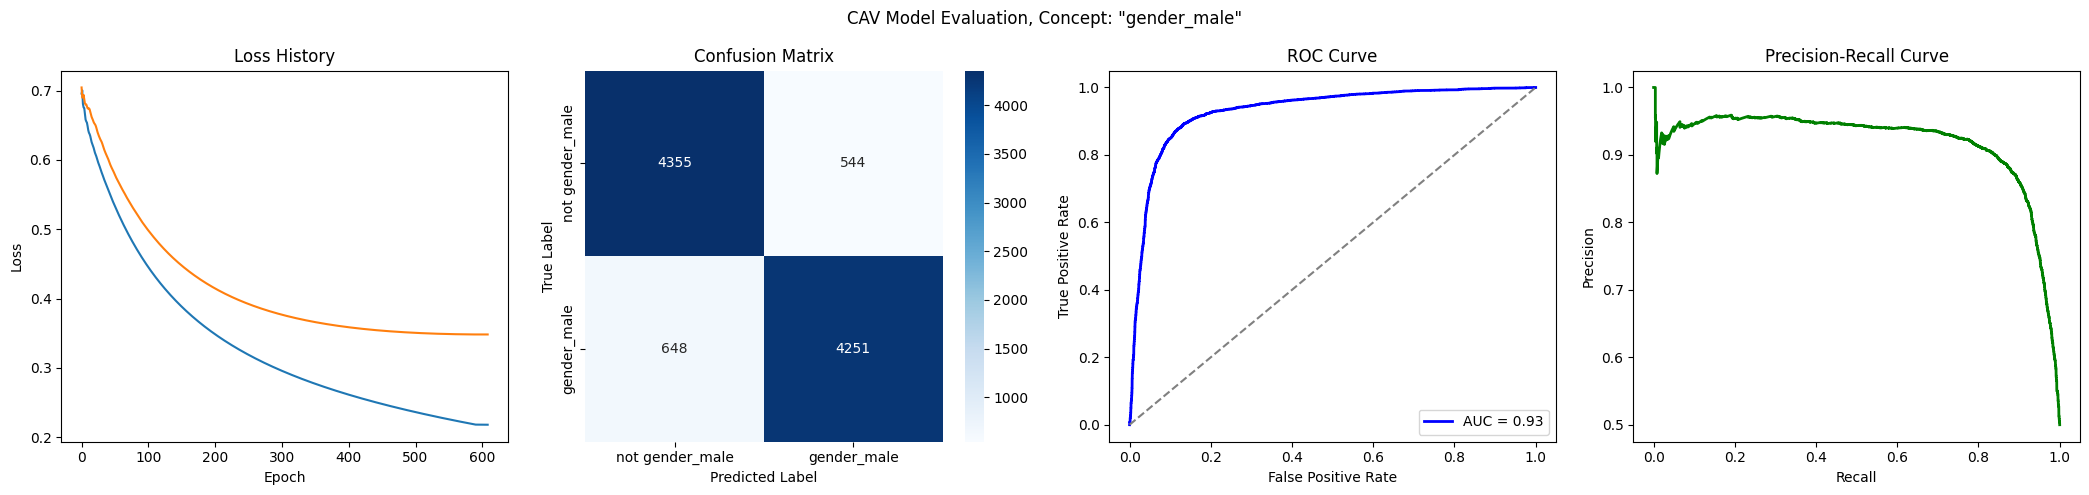


Fitting project: gender_male for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6856
Epoch 1 Validation Loss: 0.6724
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2798
Epoch 101 Validation Loss: 0.3229
Model saved to trainings/gender_male/state_dict.pth
Early stopping at epoch 144
Loss history saved to trainings/gender_male/loss_history.json


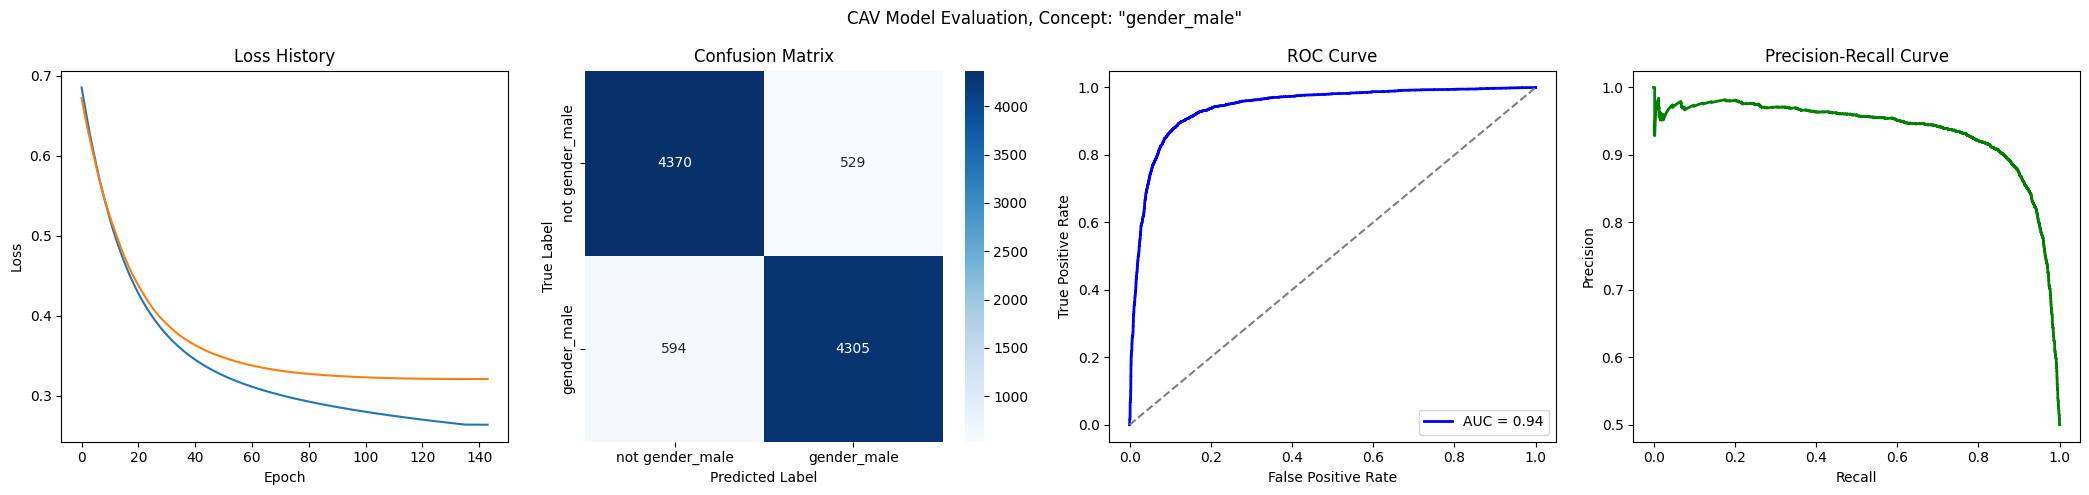


Fitting project: gender_male for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6943
Epoch 1 Validation Loss: 0.6921
Model saved to trainings/gender_male/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.6038
Epoch 101 Validation Loss: 0.6156
Model saved to trainings/gender_male/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5781
Epoch 201 Validation Loss: 0.5907
Model saved to trainings/gender_male/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.5630
Epoch 301 Validation Loss: 0.5760
Model saved to trainings/gender_male/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.5519
Epoch 401 Validation Loss: 0.5651
Model saved to trainings/gender_male/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.5427
Epoch 501 Validation Loss: 0.5558
Model saved to trainings/gender_male/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.5345
Epoch 601 Validation Loss: 0.5475
Model saved to trainings/gender_male/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

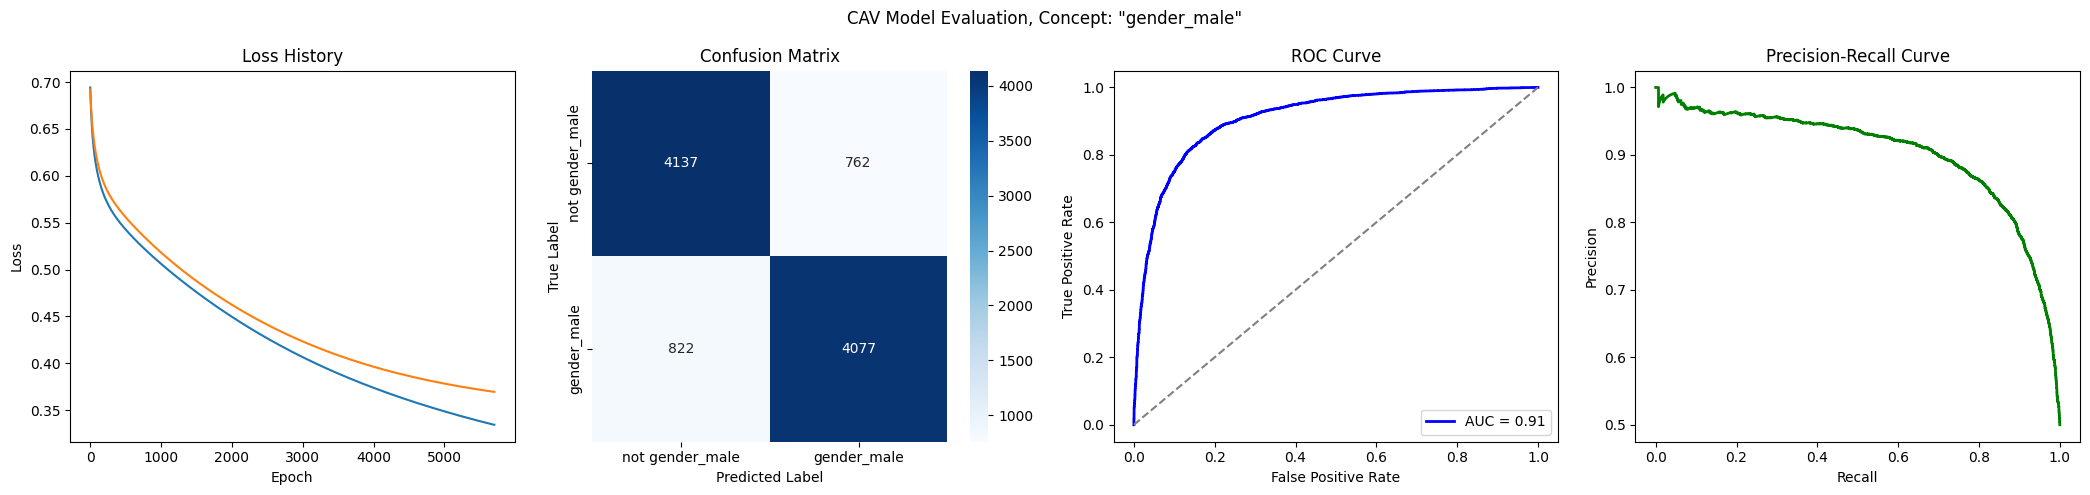


Fitting project: language_de for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6972
Epoch 1 Validation Loss: 0.6977
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4638
Epoch 101 Validation Loss: 0.6033
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 174
Loss history saved to trainings/language_de/loss_history.json


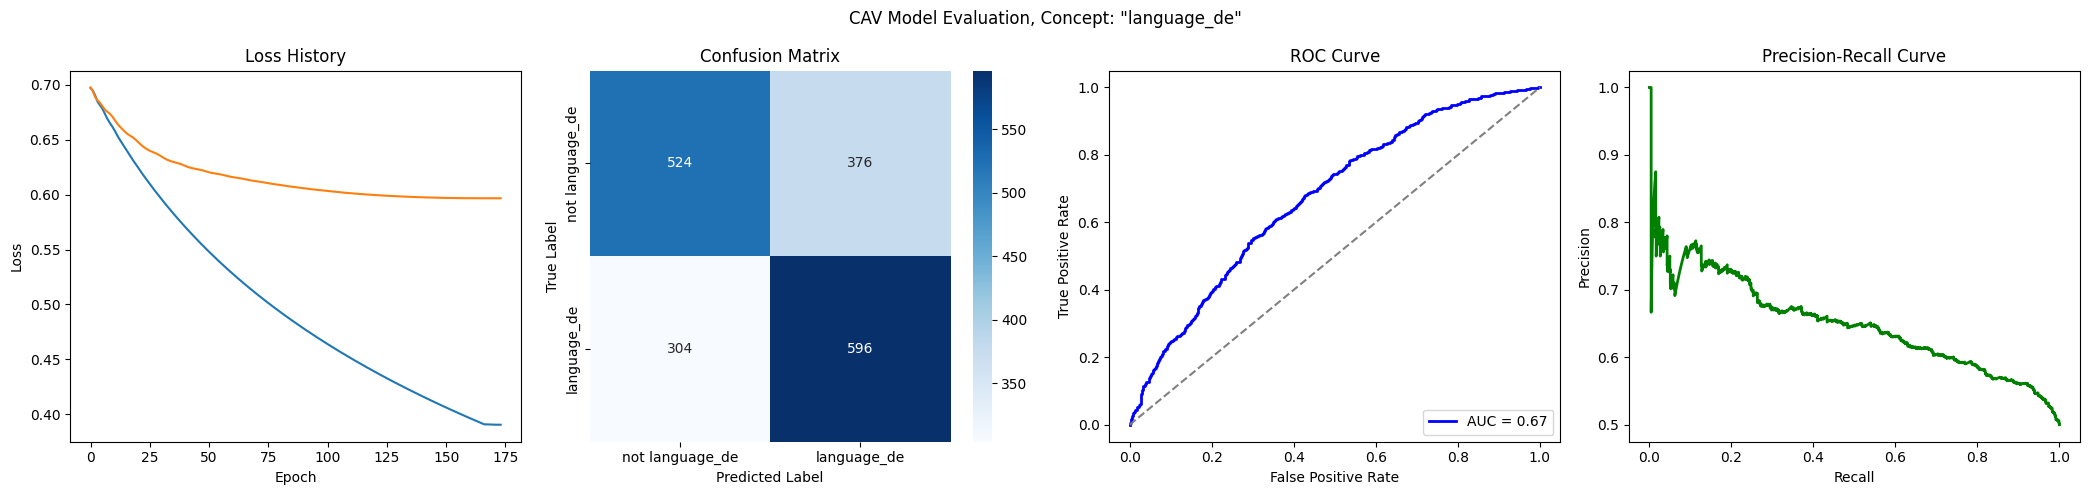


Fitting project: language_de for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7303
Epoch 1 Validation Loss: 0.6718
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0664
Epoch 101 Validation Loss: 0.0994
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0377
Epoch 201 Validation Loss: 0.0877
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 228
Loss history saved to trainings/language_de/loss_history.json


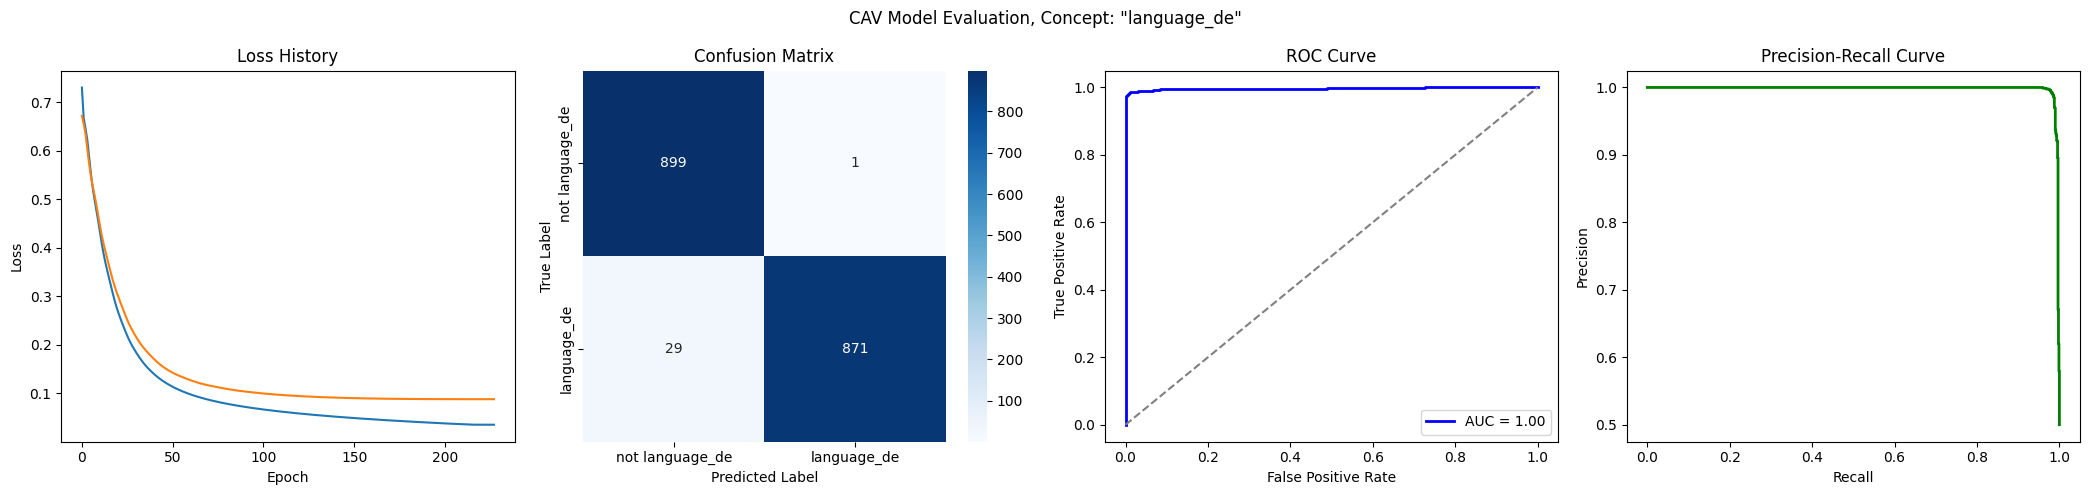


Fitting project: language_de for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6909
Epoch 1 Validation Loss: 0.6692
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1755
Epoch 101 Validation Loss: 0.3926
Model saved to trainings/language_de/state_dict.pth
Early stopping at epoch 109
Loss history saved to trainings/language_de/loss_history.json


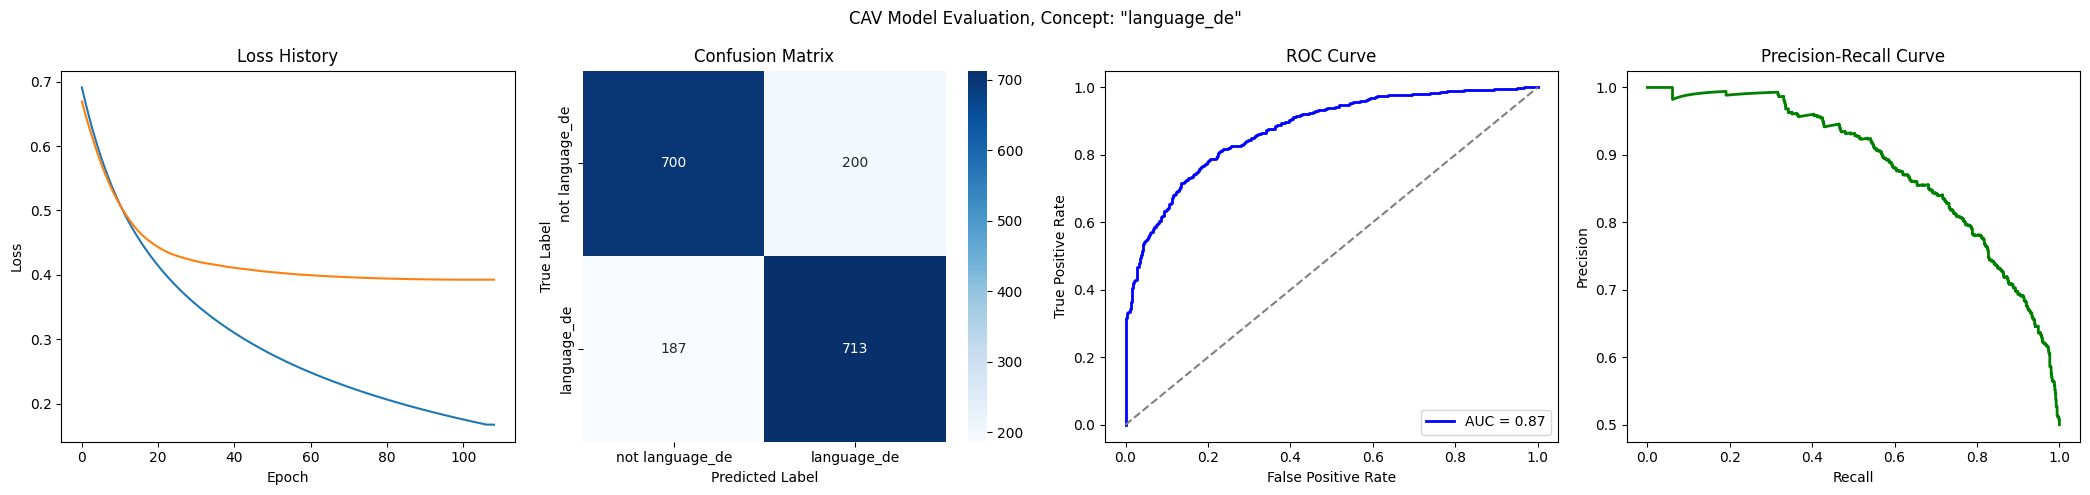


Fitting project: language_de for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6934
Epoch 1 Validation Loss: 0.6874
Model saved to trainings/language_de/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5591
Epoch 101 Validation Loss: 0.5386
Model saved to trainings/language_de/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5122
Epoch 201 Validation Loss: 0.4911
Model saved to trainings/language_de/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4867
Epoch 301 Validation Loss: 0.4687
Model saved to trainings/language_de/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.4697
Epoch 401 Validation Loss: 0.4559
Model saved to trainings/language_de/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.4567
Epoch 501 Validation Loss: 0.4477
Model saved to trainings/language_de/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.4461
Epoch 601 Validation Loss: 0.4420
Model saved to trainings/language_de/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

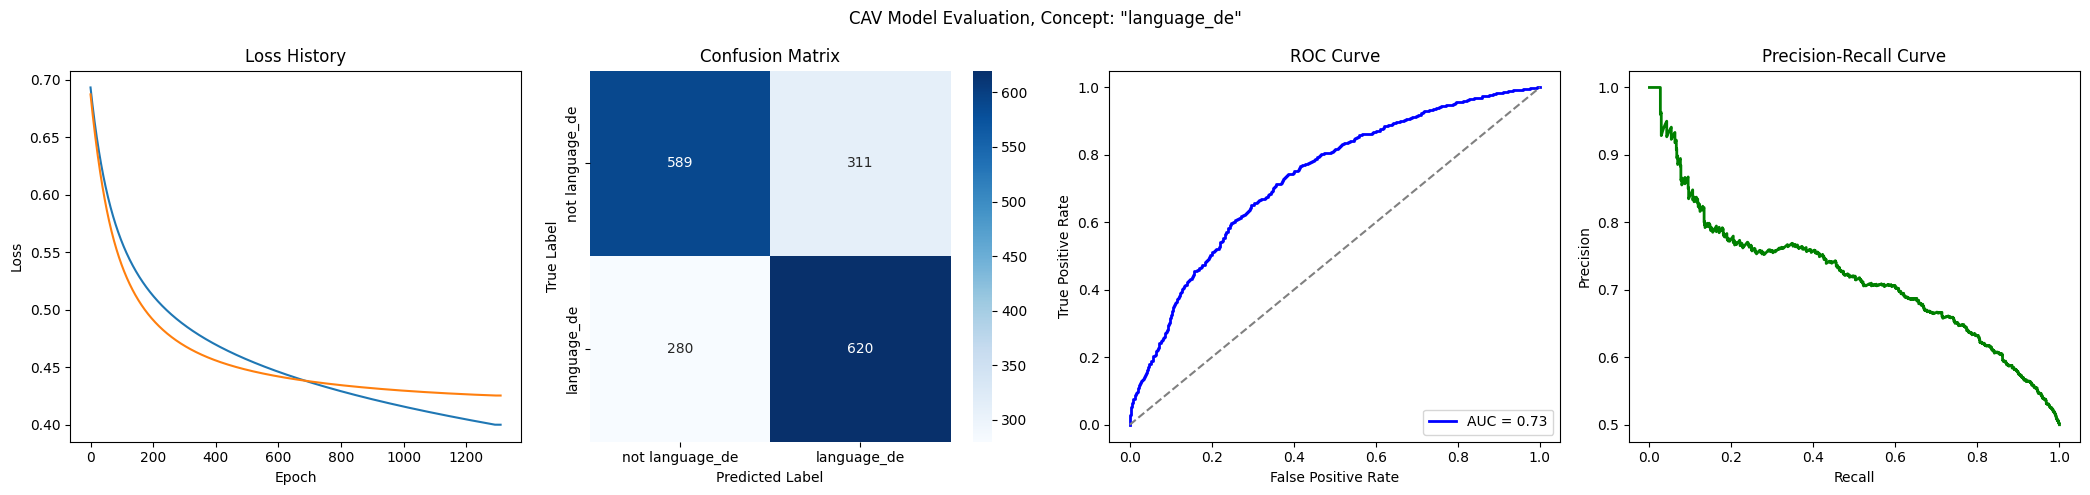


Fitting project: language_en for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6949
Epoch 1 Validation Loss: 0.6951
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 48
Loss history saved to trainings/language_en/loss_history.json


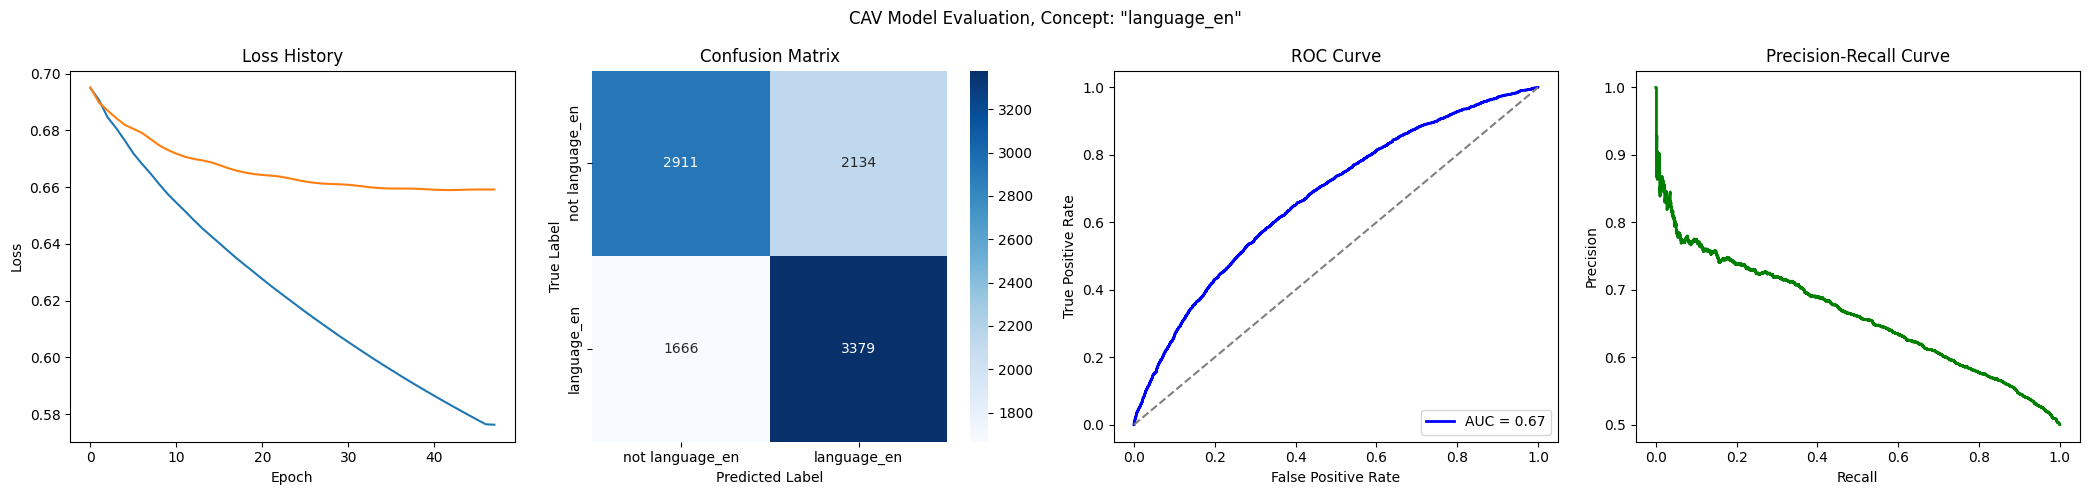


Fitting project: language_en for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6975
Epoch 1 Validation Loss: 0.6423
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0784
Epoch 101 Validation Loss: 0.0778
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0586
Epoch 201 Validation Loss: 0.0724
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 256
Loss history saved to trainings/language_en/loss_history.json


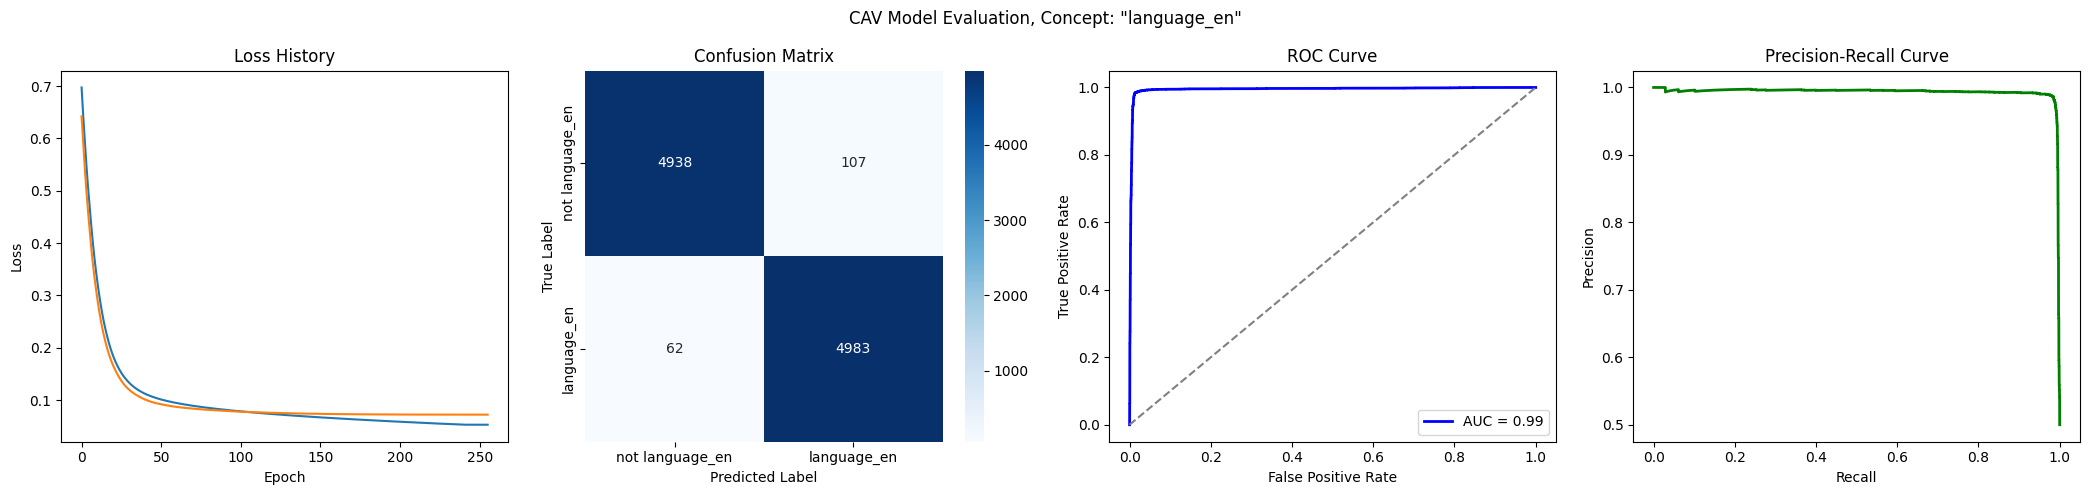


Fitting project: language_en for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6884
Epoch 1 Validation Loss: 0.6681
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2073
Epoch 101 Validation Loss: 0.3584
Model saved to trainings/language_en/state_dict.pth
Early stopping at epoch 153
Loss history saved to trainings/language_en/loss_history.json


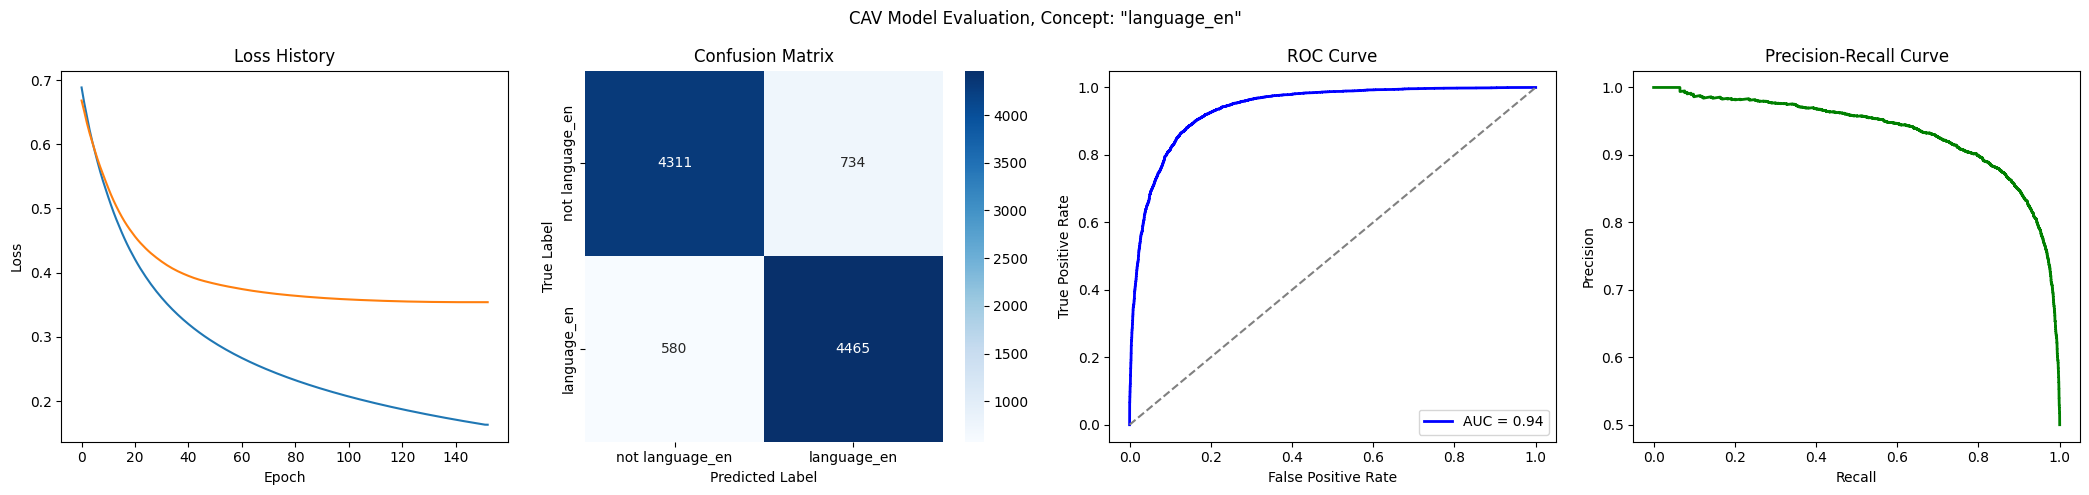


Fitting project: language_en for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6915
Epoch 1 Validation Loss: 0.6907
Model saved to trainings/language_en/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5090
Epoch 101 Validation Loss: 0.5978
Model saved to trainings/language_en/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4495
Epoch 201 Validation Loss: 0.5703
Model saved to trainings/language_en/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4203
Epoch 301 Validation Loss: 0.5582
Model saved to trainings/language_en/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.4021
Epoch 401 Validation Loss: 0.5501
Model saved to trainings/language_en/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.3891
Epoch 501 Validation Loss: 0.5434
Model saved to trainings/language_en/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.3791
Epoch 601 Validation Loss: 0.5372
Model saved to trainings/language_en/state_dict.pth
Epoch 701/10000
Epoch 701 Trai

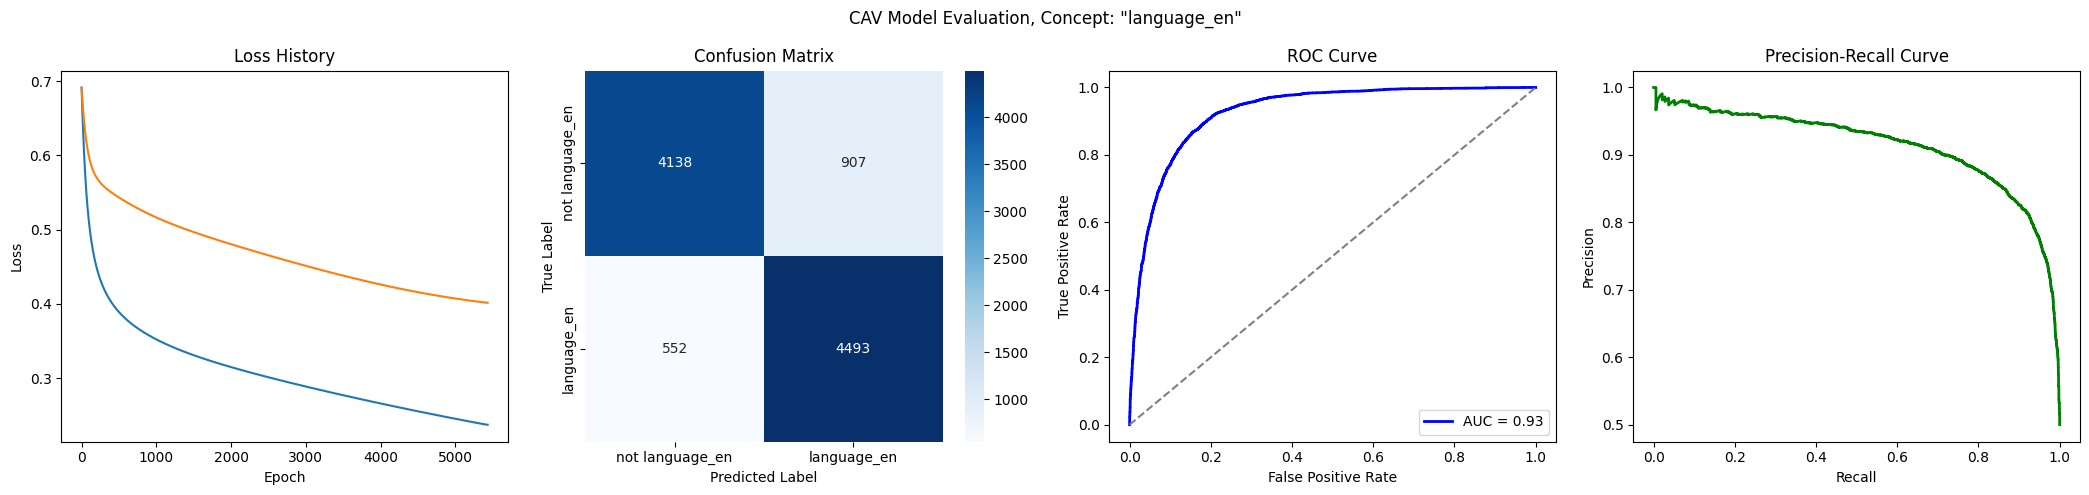


Fitting project: language_es for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6959
Epoch 1 Validation Loss: 0.6931
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 8
Loss history saved to trainings/language_es/loss_history.json


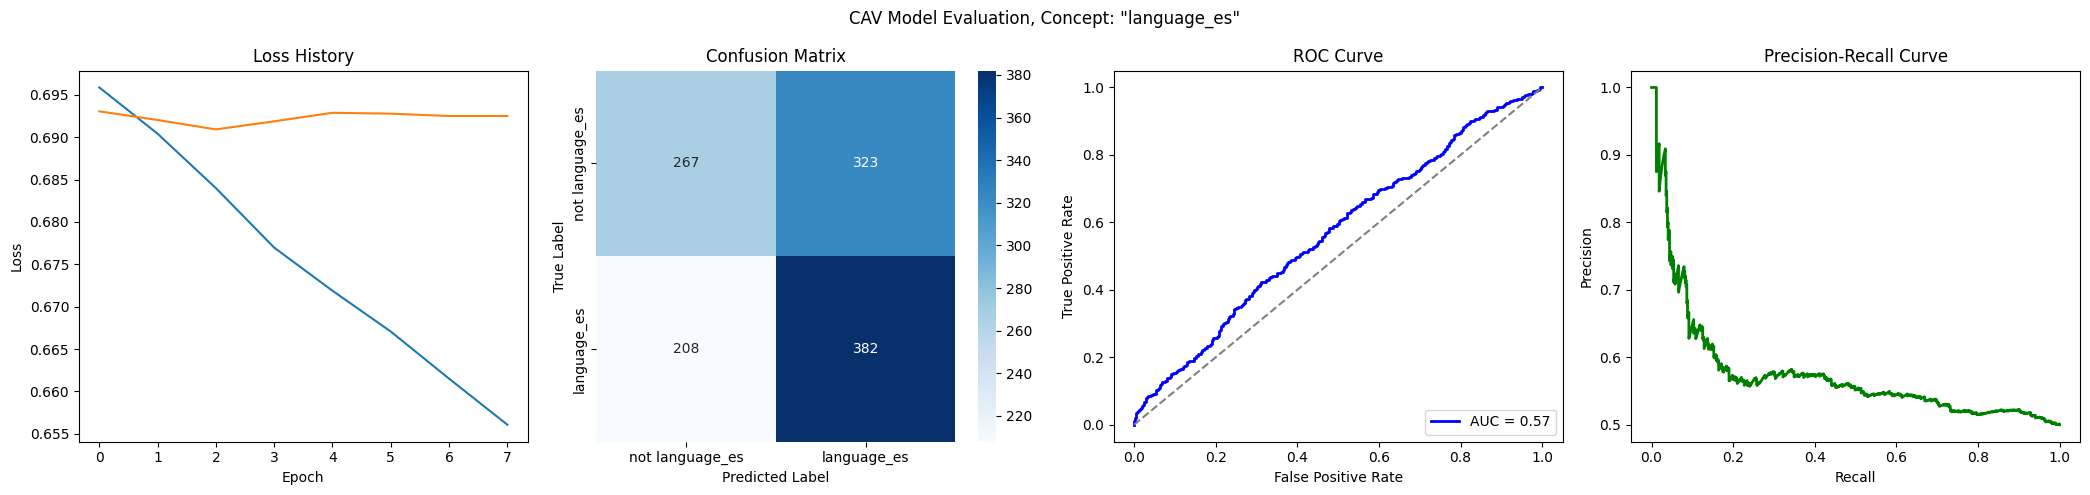


Fitting project: language_es for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6948
Epoch 1 Validation Loss: 0.6763
Model saved to trainings/language_es/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0991
Epoch 101 Validation Loss: 0.2005
Model saved to trainings/language_es/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0493
Epoch 201 Validation Loss: 0.1624
Model saved to trainings/language_es/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0297
Epoch 301 Validation Loss: 0.1514
Model saved to trainings/language_es/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0200
Epoch 401 Validation Loss: 0.1483
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 464
Loss history saved to trainings/language_es/loss_history.json


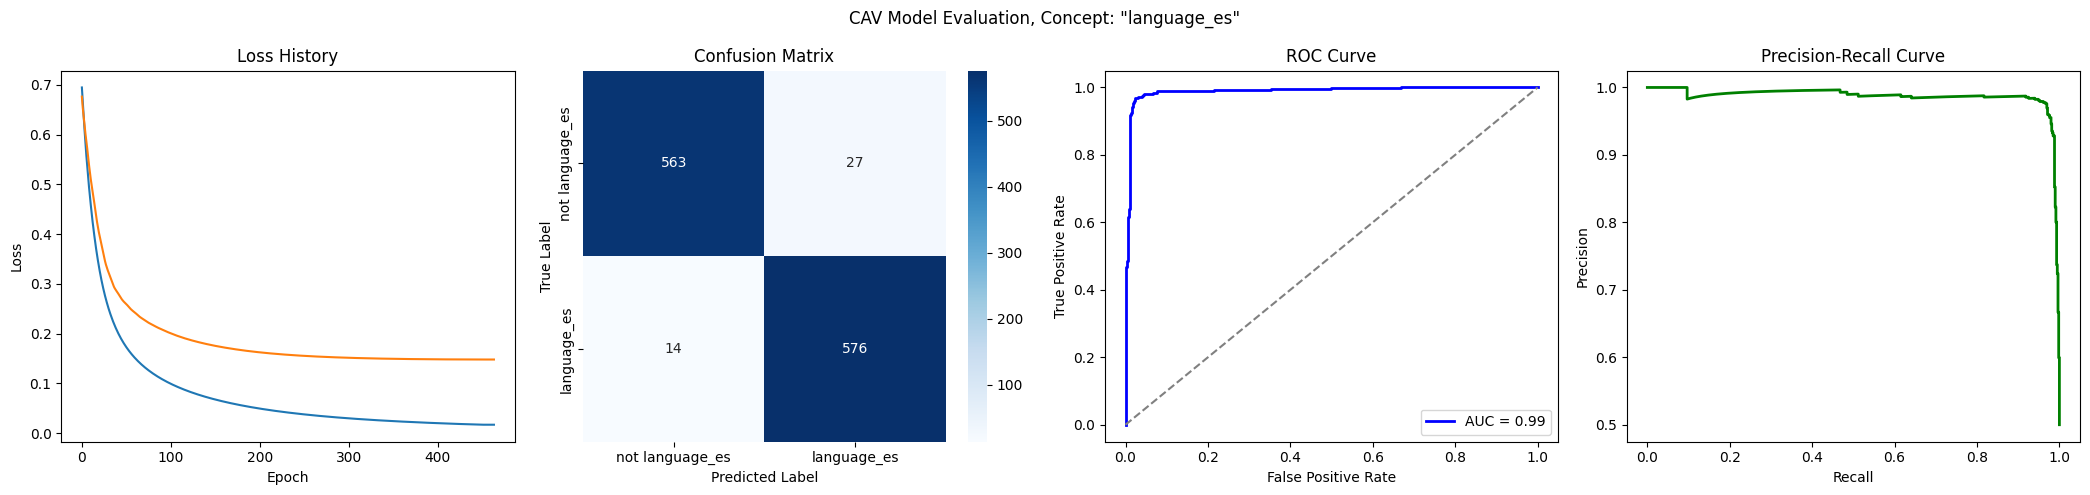


Fitting project: language_es for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6936
Epoch 1 Validation Loss: 0.7008
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 6
Loss history saved to trainings/language_es/loss_history.json


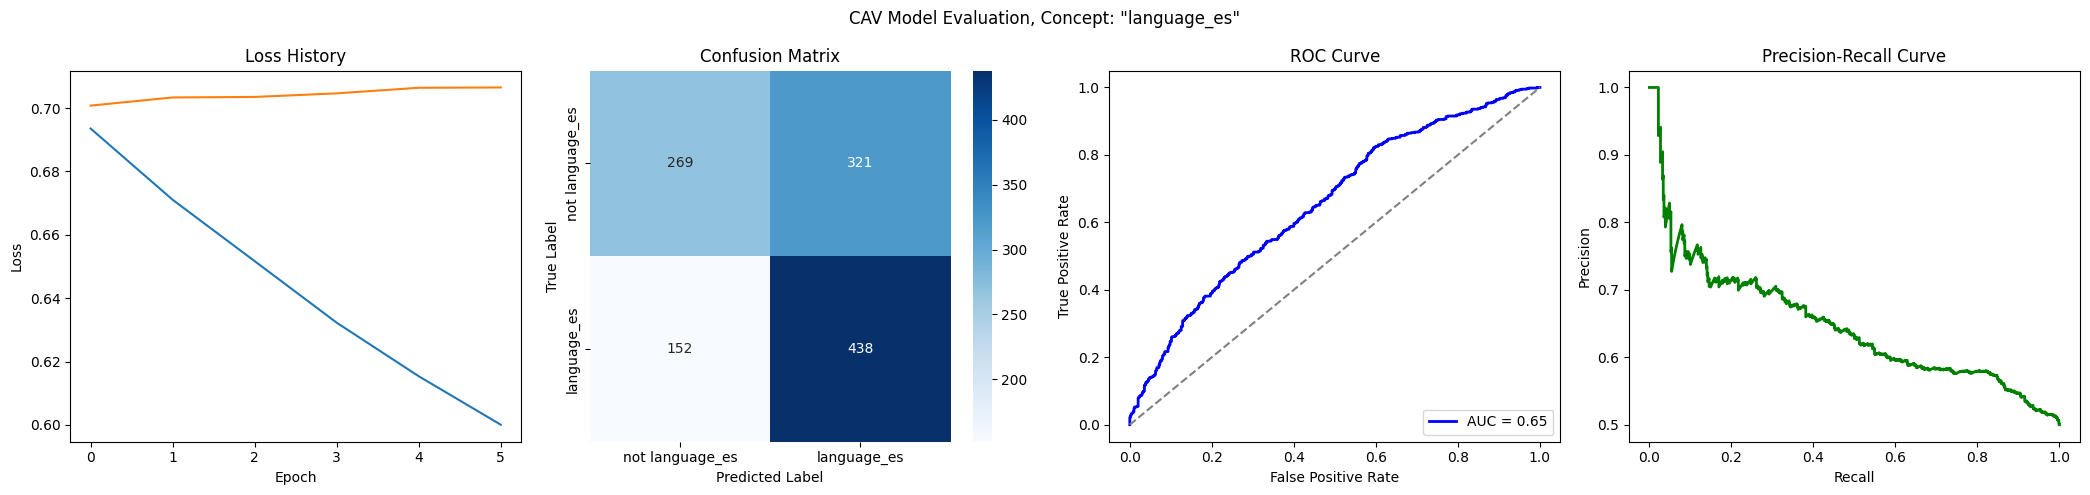


Fitting project: language_es for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6924
Epoch 1 Validation Loss: 0.6928
Model saved to trainings/language_es/state_dict.pth
Early stopping at epoch 77
Loss history saved to trainings/language_es/loss_history.json


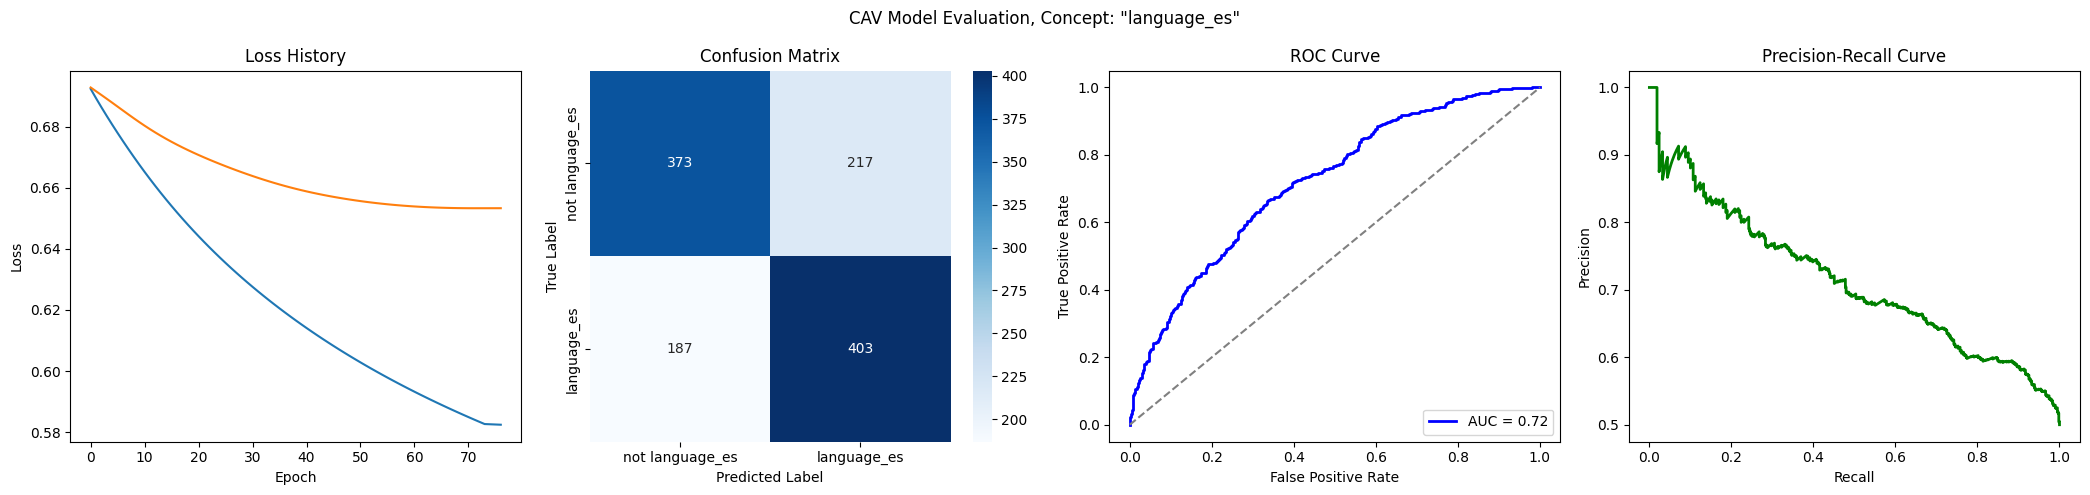


Fitting project: language_fr for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6959
Epoch 1 Validation Loss: 0.6887
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4625
Epoch 101 Validation Loss: 0.5146
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 195
Loss history saved to trainings/language_fr/loss_history.json


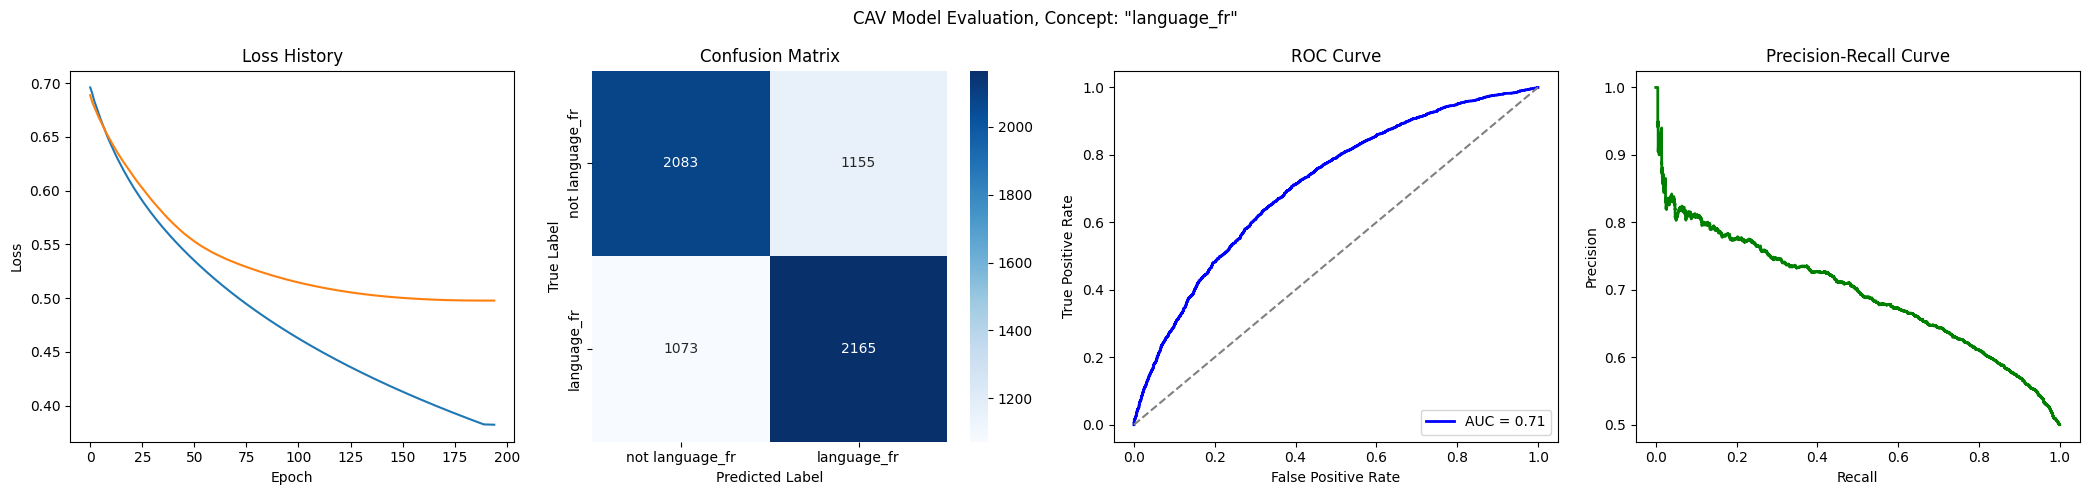


Fitting project: language_fr for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6962
Epoch 1 Validation Loss: 0.6561
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0678
Epoch 101 Validation Loss: 0.0428
Model saved to trainings/language_fr/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0395
Epoch 201 Validation Loss: 0.0245
Model saved to trainings/language_fr/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0259
Epoch 301 Validation Loss: 0.0179
Model saved to trainings/language_fr/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0180
Epoch 401 Validation Loss: 0.0141
Model saved to trainings/language_fr/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0132
Epoch 501 Validation Loss: 0.0115
Model saved to trainings/language_fr/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0101
Epoch 601 Validation Loss: 0.0097
Model saved to trainings/language_fr/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

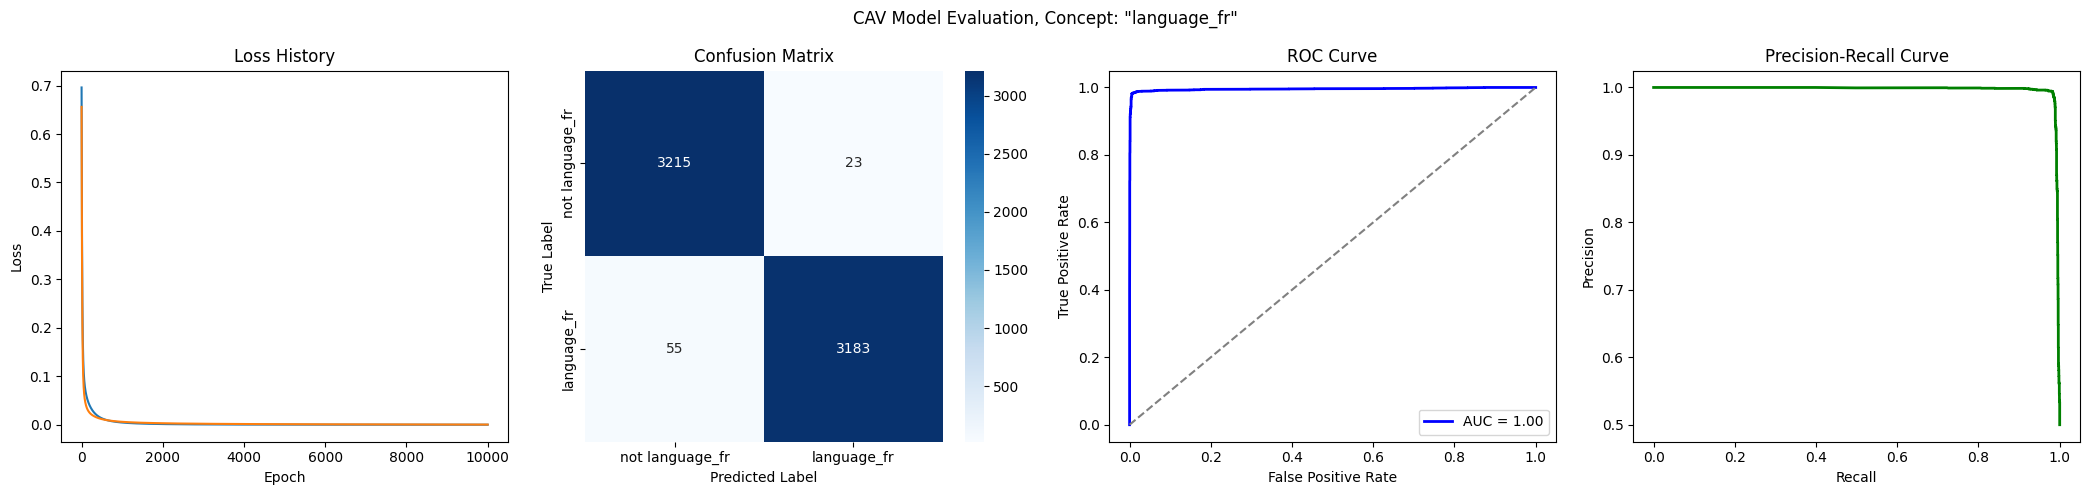


Fitting project: language_fr for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7069
Epoch 1 Validation Loss: 0.6914
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2621
Epoch 101 Validation Loss: 0.3792
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 163
Loss history saved to trainings/language_fr/loss_history.json


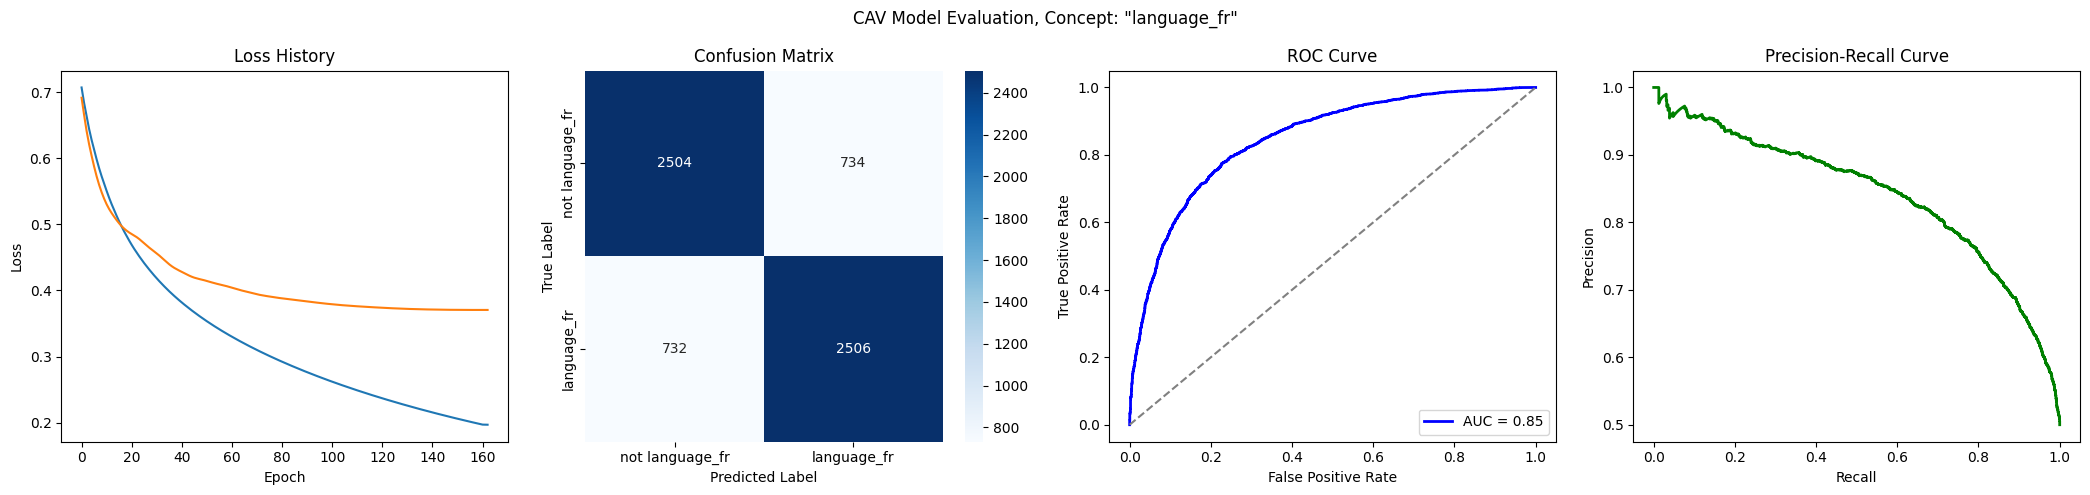


Fitting project: language_fr for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6927
Epoch 1 Validation Loss: 0.6906
Model saved to trainings/language_fr/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5552
Epoch 101 Validation Loss: 0.5229
Model saved to trainings/language_fr/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.5163
Epoch 201 Validation Loss: 0.4969
Model saved to trainings/language_fr/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.4961
Epoch 301 Validation Loss: 0.4909
Model saved to trainings/language_fr/state_dict.pth
Early stopping at epoch 353
Loss history saved to trainings/language_fr/loss_history.json


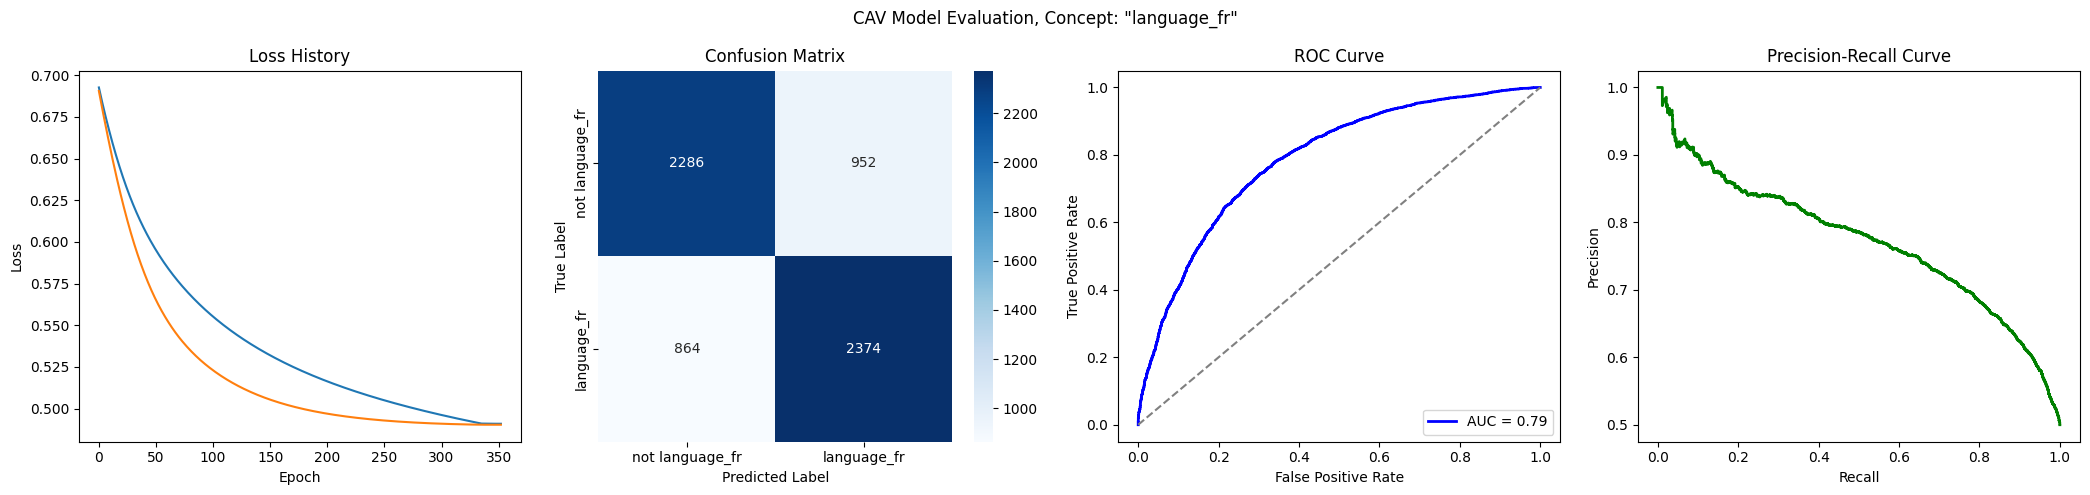


Fitting project: language_it for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.6991
Epoch 1 Validation Loss: 0.6861
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 30
Loss history saved to trainings/language_it/loss_history.json


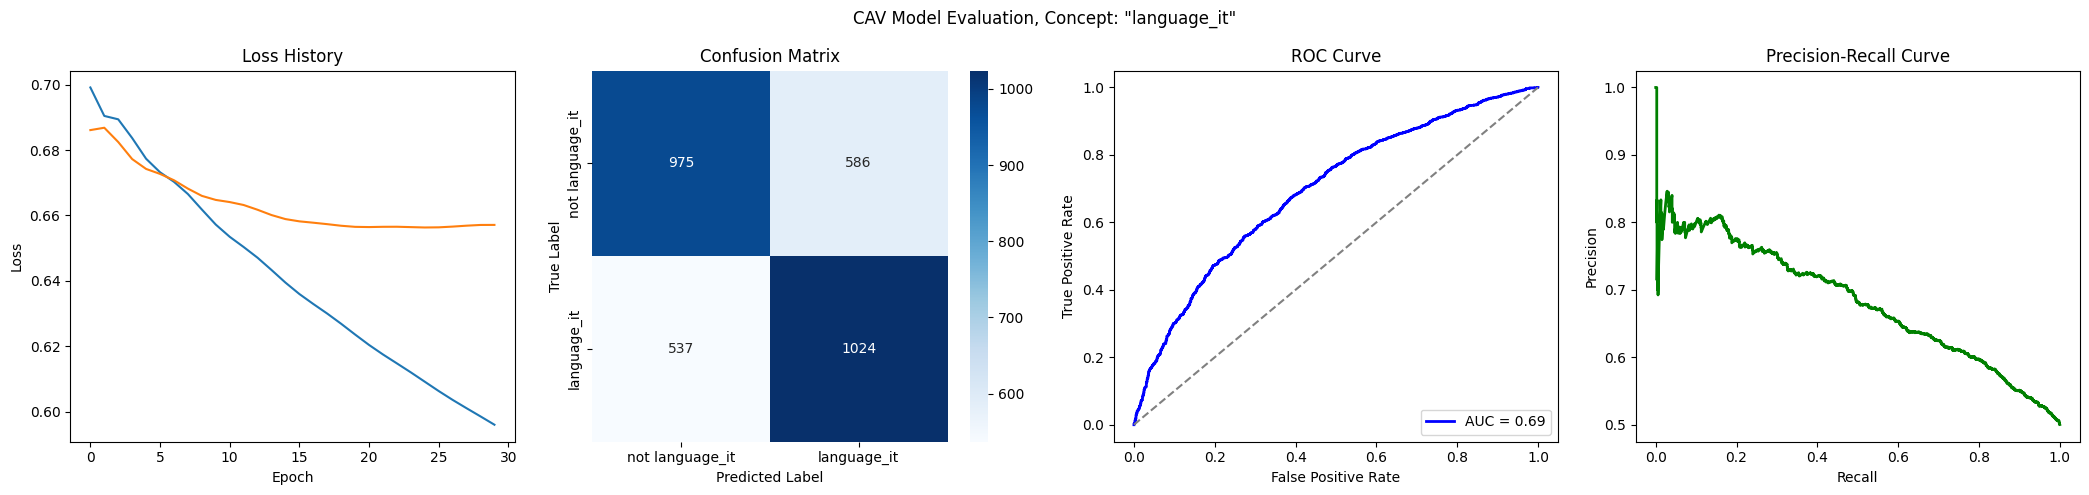


Fitting project: language_it for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.6921
Epoch 1 Validation Loss: 0.6524
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0515
Epoch 101 Validation Loss: 0.0616
Model saved to trainings/language_it/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0227
Epoch 201 Validation Loss: 0.0320
Model saved to trainings/language_it/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0132
Epoch 301 Validation Loss: 0.0204
Model saved to trainings/language_it/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0088
Epoch 401 Validation Loss: 0.0147
Model saved to trainings/language_it/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0063
Epoch 501 Validation Loss: 0.0113
Model saved to trainings/language_it/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0048
Epoch 601 Validation Loss: 0.0091
Model saved to trainings/language_it/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

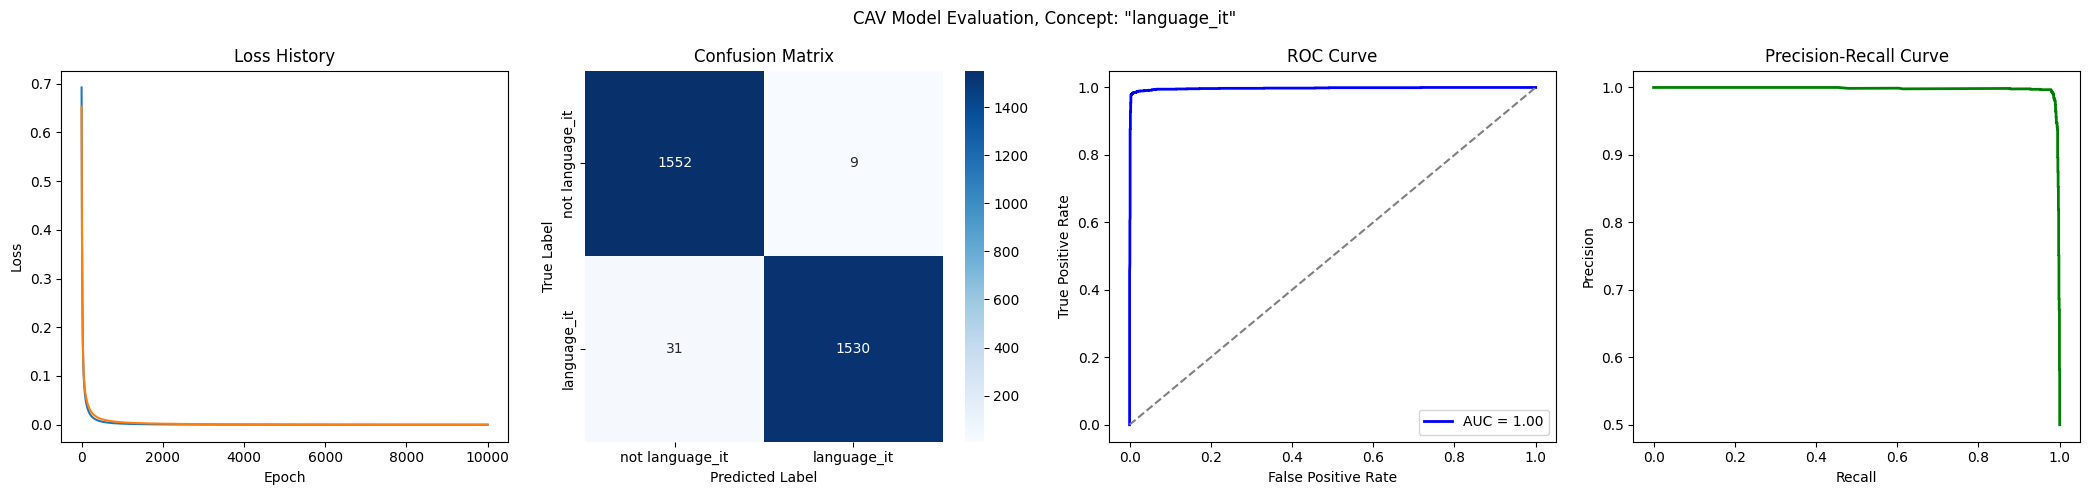


Fitting project: language_it for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.6944
Epoch 1 Validation Loss: 0.6741
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 33
Loss history saved to trainings/language_it/loss_history.json


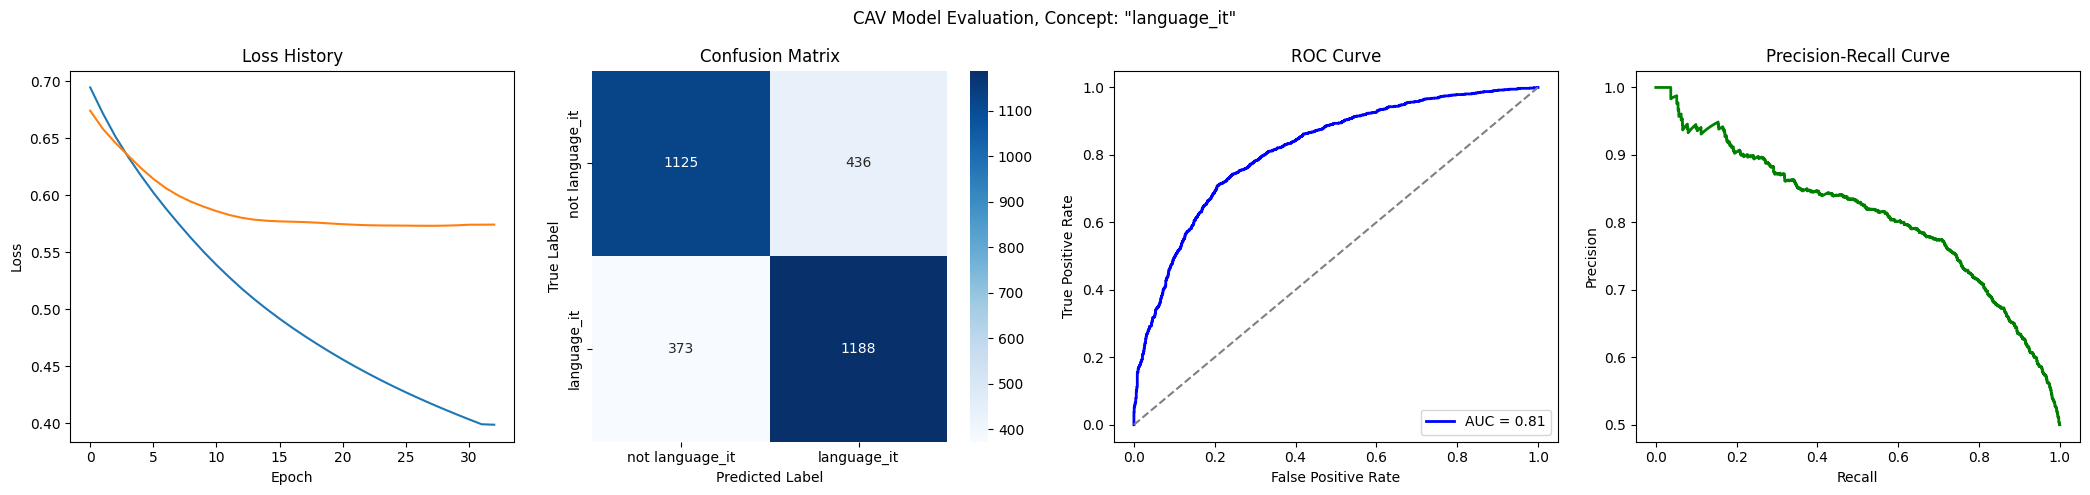


Fitting project: language_it for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6954
Epoch 1 Validation Loss: 0.6931
Model saved to trainings/language_it/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5720
Epoch 101 Validation Loss: 0.6270
Model saved to trainings/language_it/state_dict.pth
Early stopping at epoch 185
Loss history saved to trainings/language_it/loss_history.json


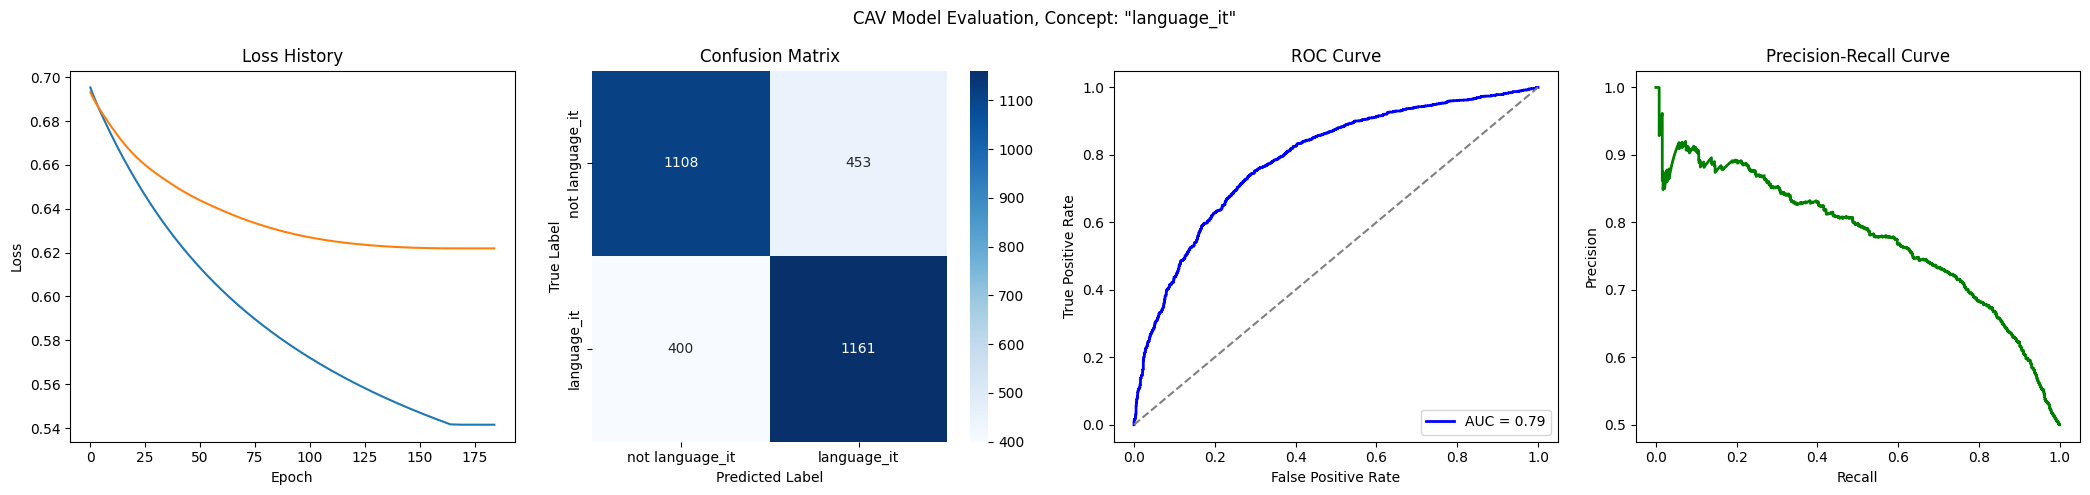


Fitting project: language_ja for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.7018
Epoch 1 Validation Loss: 0.6890
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.3858
Epoch 101 Validation Loss: 0.5402
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 155
Loss history saved to trainings/language_ja/loss_history.json


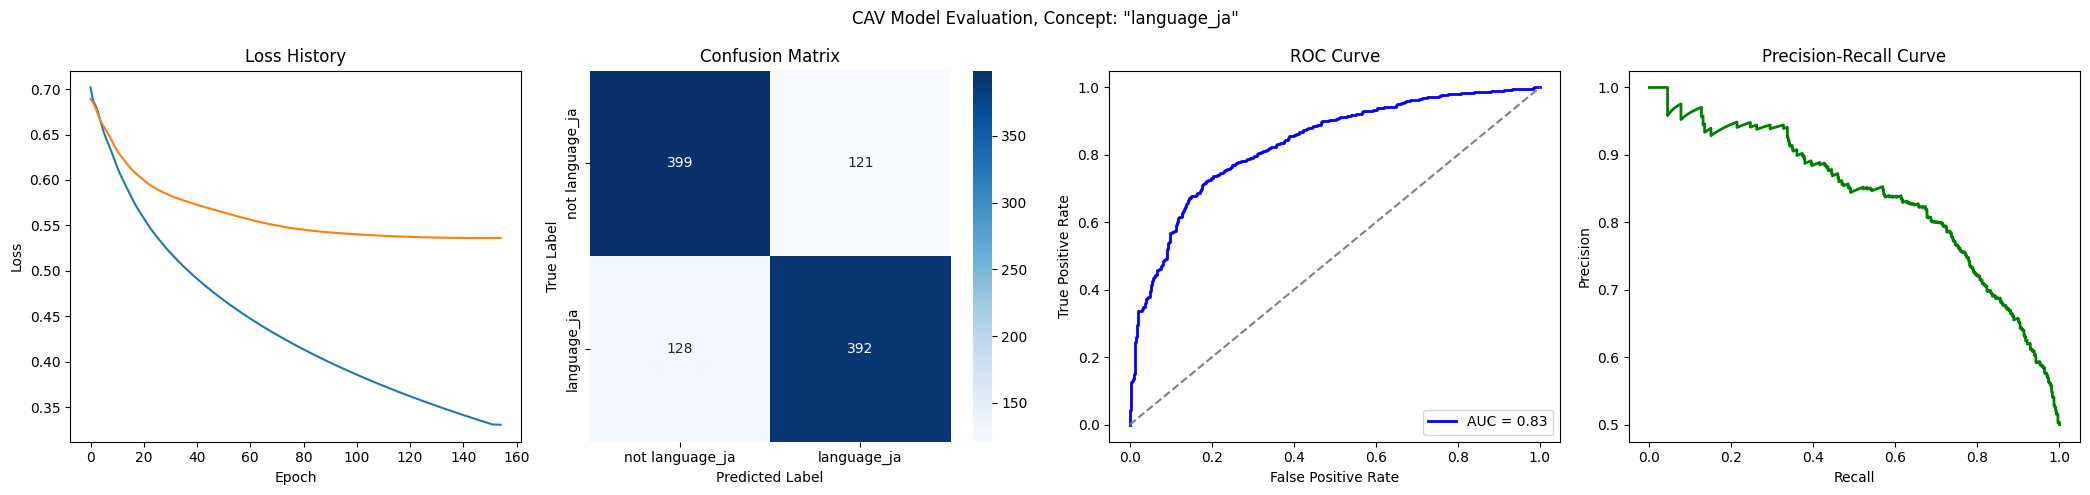


Fitting project: language_ja for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7121
Epoch 1 Validation Loss: 0.6556
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0592
Epoch 101 Validation Loss: 0.0774
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0327
Epoch 201 Validation Loss: 0.0593
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0206
Epoch 301 Validation Loss: 0.0554
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 372
Loss history saved to trainings/language_ja/loss_history.json


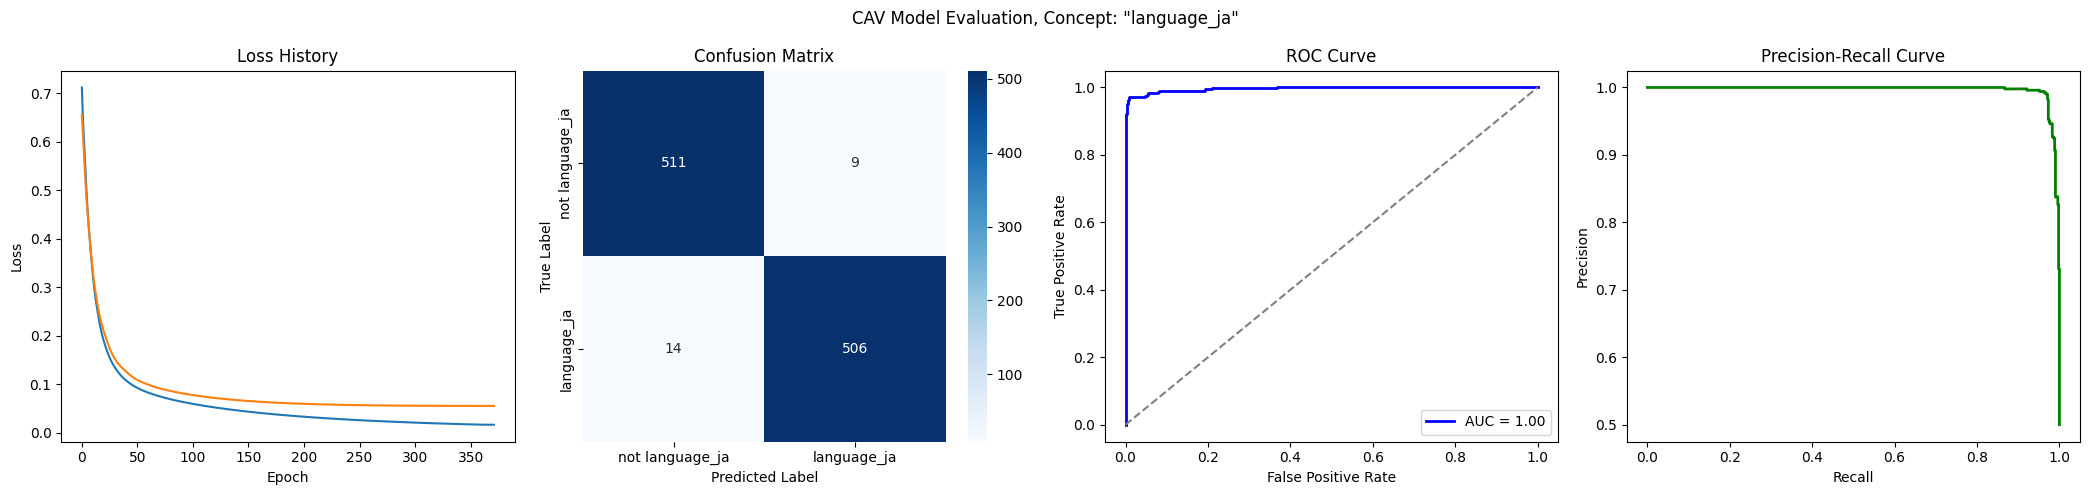


Fitting project: language_ja for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7035
Epoch 1 Validation Loss: 0.6635
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.1240
Epoch 101 Validation Loss: 0.3119
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 130
Loss history saved to trainings/language_ja/loss_history.json


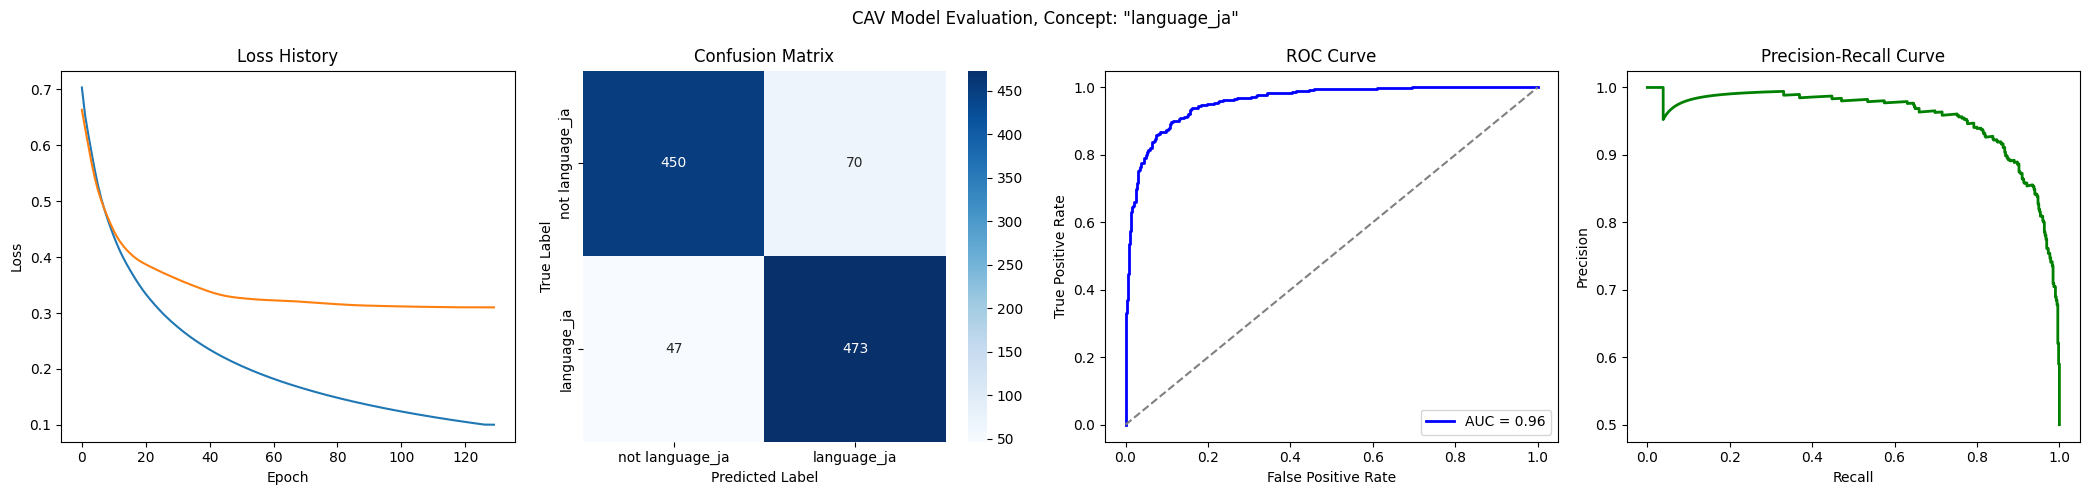


Fitting project: language_ja for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6932
Epoch 1 Validation Loss: 0.6891
Model saved to trainings/language_ja/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.4748
Epoch 101 Validation Loss: 0.5297
Model saved to trainings/language_ja/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.4061
Epoch 201 Validation Loss: 0.4944
Model saved to trainings/language_ja/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.3715
Epoch 301 Validation Loss: 0.4835
Model saved to trainings/language_ja/state_dict.pth
Early stopping at epoch 371
Loss history saved to trainings/language_ja/loss_history.json


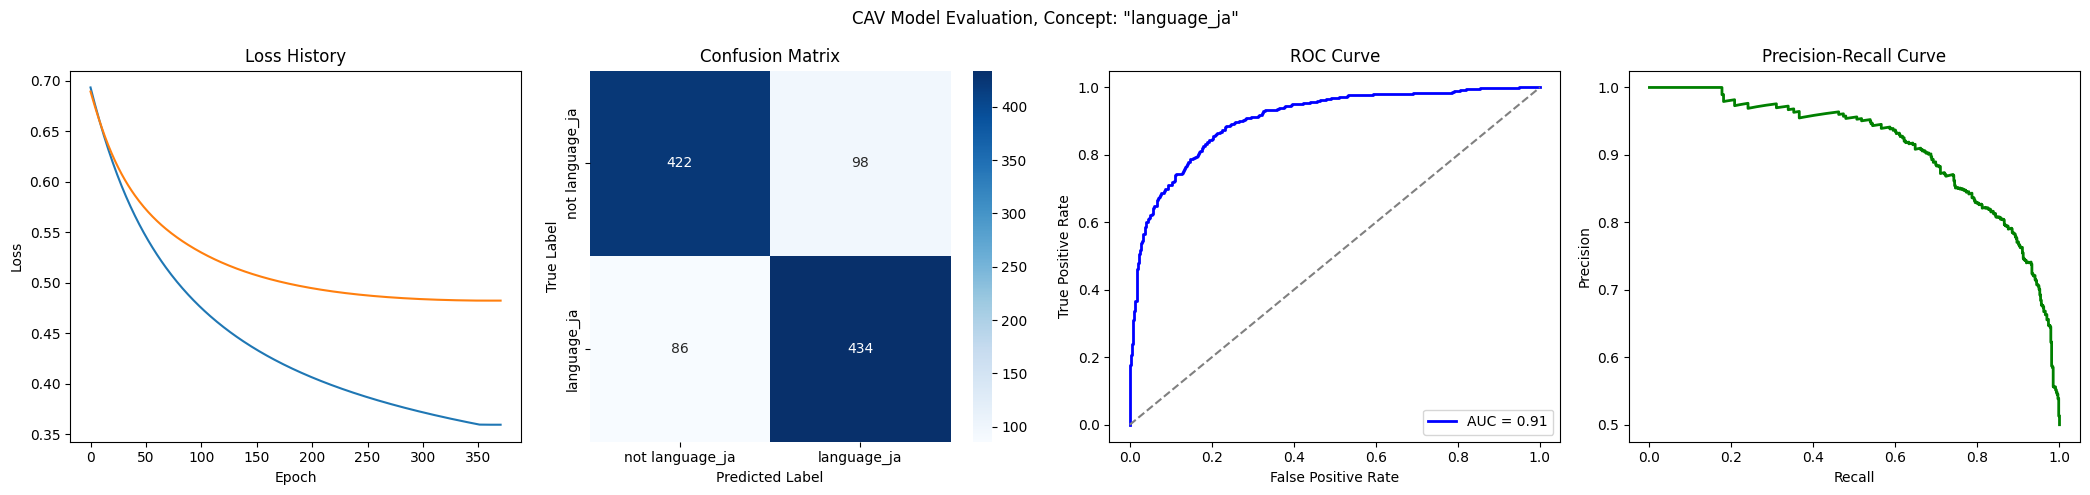


Fitting project: language_pt for encoder: mert_v1_95m
Epoch 1/10000
Epoch 1 Train Loss: 0.7030
Epoch 1 Validation Loss: 0.6989
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 74
Loss history saved to trainings/language_pt/loss_history.json


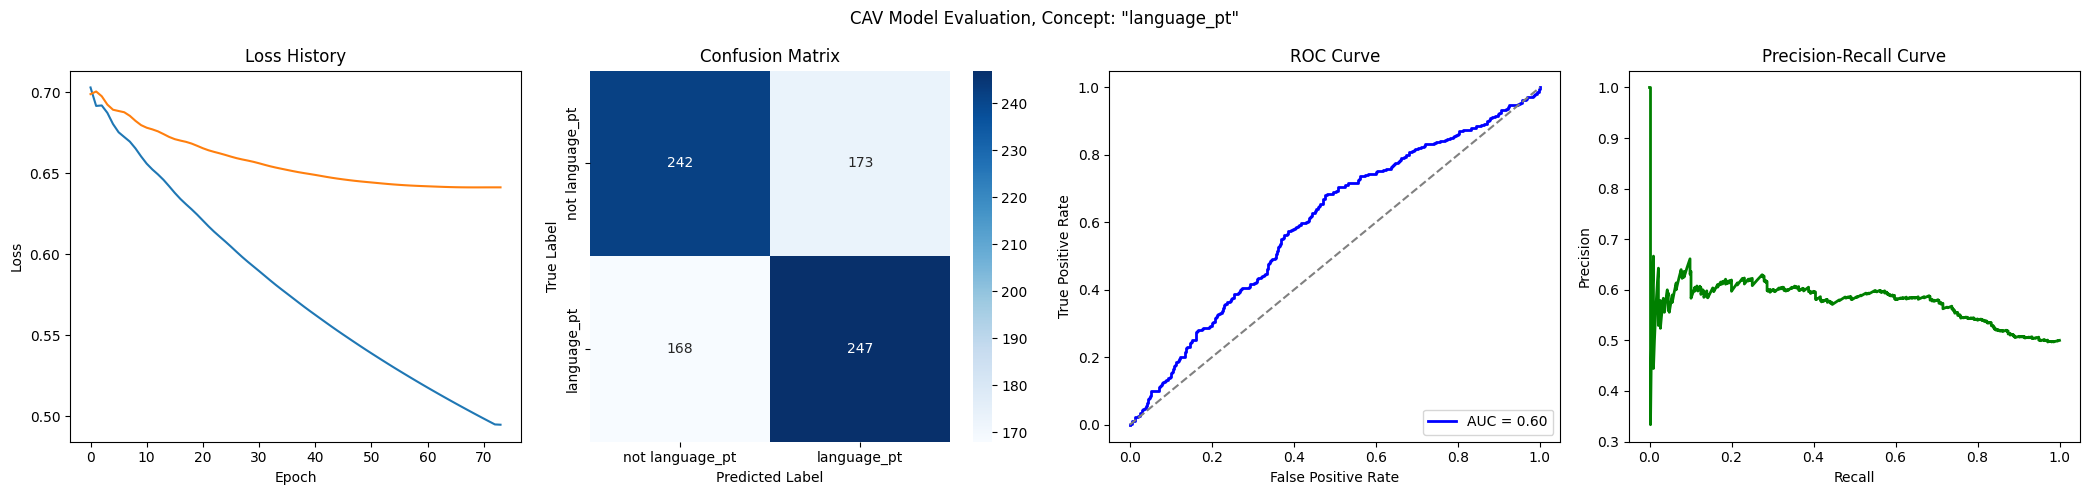


Fitting project: language_pt for encoder: whisper_large_v2
Epoch 1/10000
Epoch 1 Train Loss: 0.7027
Epoch 1 Validation Loss: 0.6736
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.0436
Epoch 101 Validation Loss: 0.0724
Model saved to trainings/language_pt/state_dict.pth
Epoch 201/10000
Epoch 201 Train Loss: 0.0186
Epoch 201 Validation Loss: 0.0388
Model saved to trainings/language_pt/state_dict.pth
Epoch 301/10000
Epoch 301 Train Loss: 0.0107
Epoch 301 Validation Loss: 0.0267
Model saved to trainings/language_pt/state_dict.pth
Epoch 401/10000
Epoch 401 Train Loss: 0.0072
Epoch 401 Validation Loss: 0.0204
Model saved to trainings/language_pt/state_dict.pth
Epoch 501/10000
Epoch 501 Train Loss: 0.0052
Epoch 501 Validation Loss: 0.0165
Model saved to trainings/language_pt/state_dict.pth
Epoch 601/10000
Epoch 601 Train Loss: 0.0039
Epoch 601 Validation Loss: 0.0138
Model saved to trainings/language_pt/state_dict.pth
Epoch 701/10000
Epoch 701 Tra

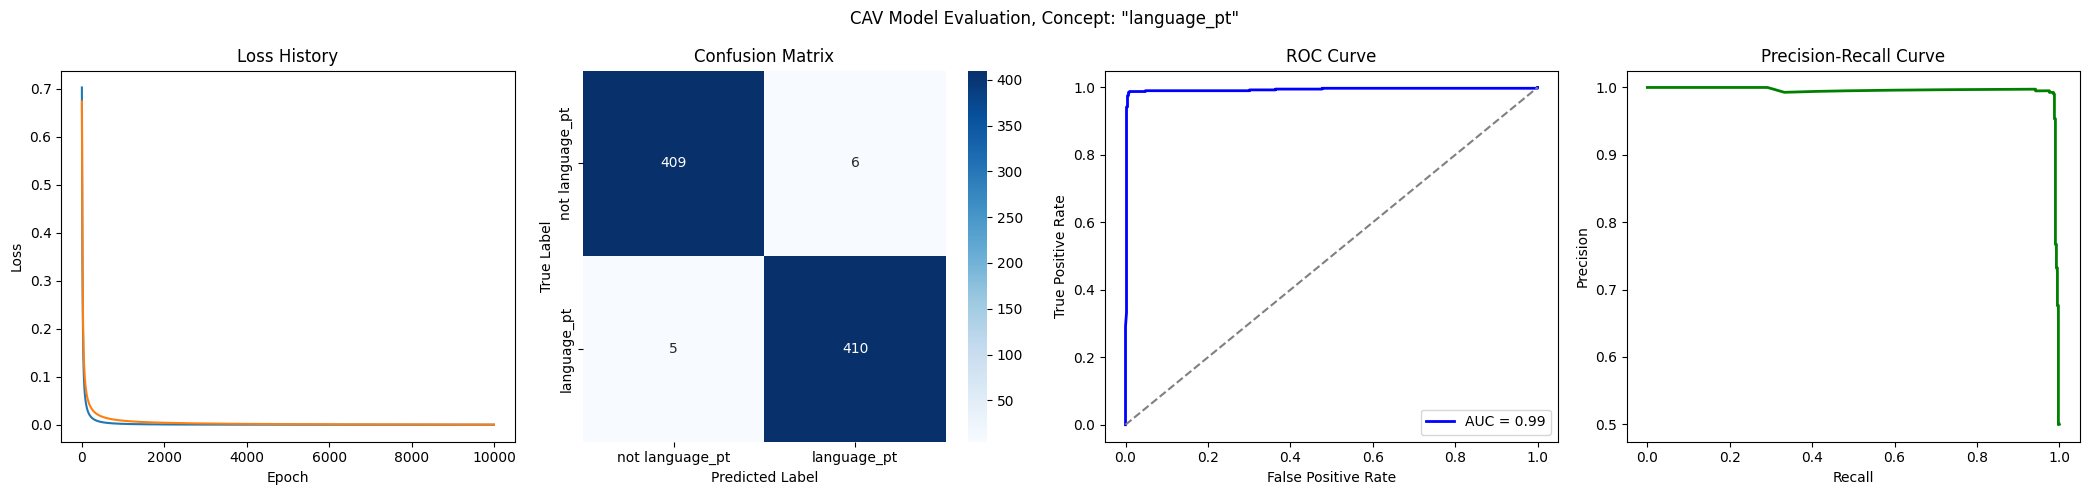


Fitting project: language_pt for encoder: muq_large_msd
Epoch 1/10000
Epoch 1 Train Loss: 0.7025
Epoch 1 Validation Loss: 0.7022
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.2096
Epoch 101 Validation Loss: 0.3927
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 147
Loss history saved to trainings/language_pt/loss_history.json


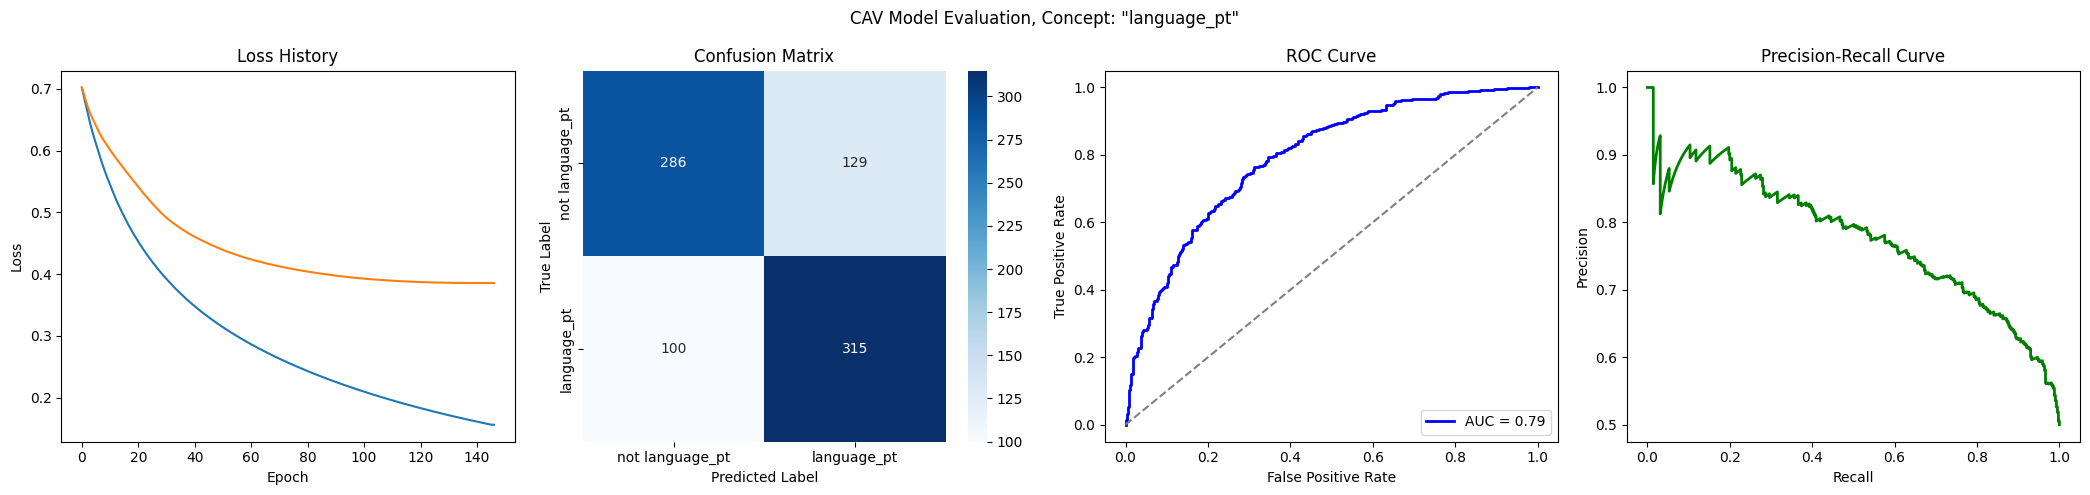


Fitting project: language_pt for encoder: muq_mulan_large
Epoch 1/10000
Epoch 1 Train Loss: 0.6928
Epoch 1 Validation Loss: 0.6914
Model saved to trainings/language_pt/state_dict.pth
Epoch 101/10000
Epoch 101 Train Loss: 0.5598
Epoch 101 Validation Loss: 0.5781
Model saved to trainings/language_pt/state_dict.pth
Early stopping at epoch 147
Loss history saved to trainings/language_pt/loss_history.json


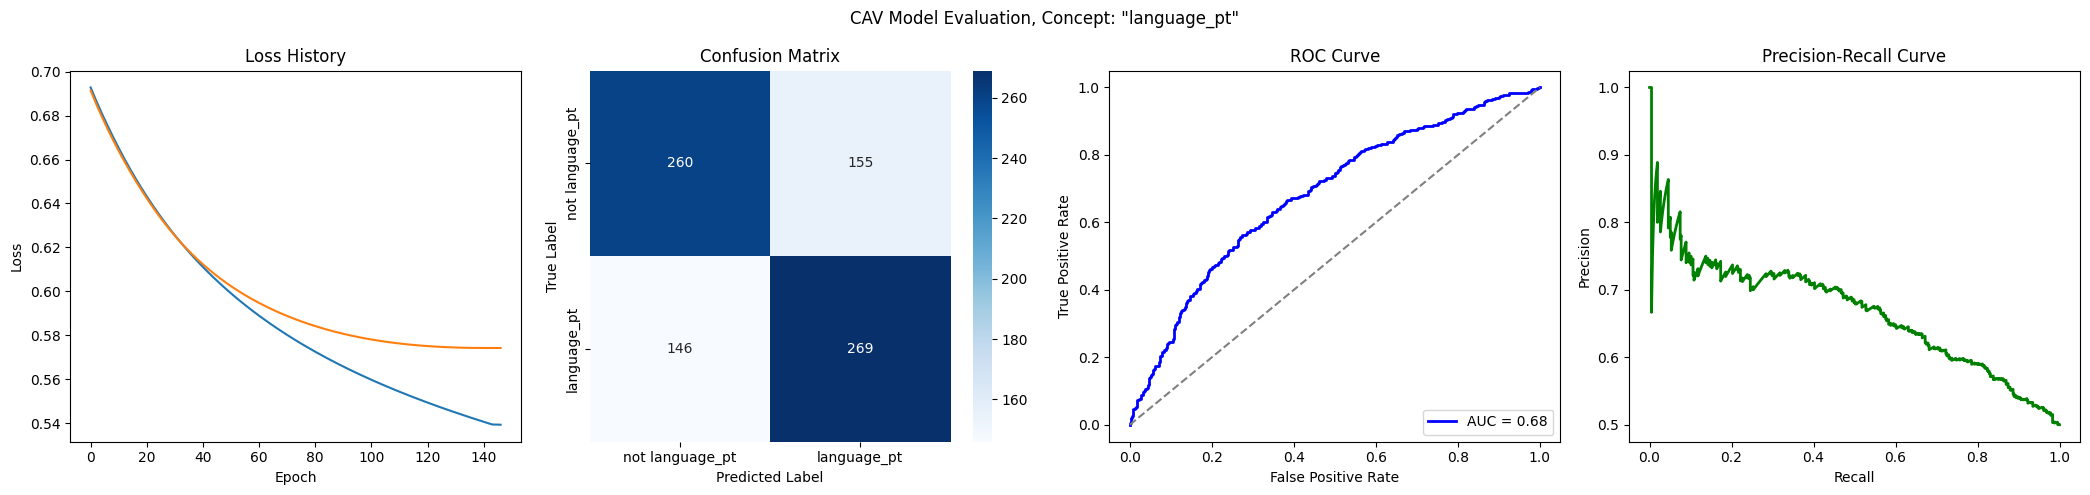

In [8]:
train_variations = [*itertools.product(project_names, encoder_ids)]


for project_name, (encoder_id, embedding_dim) in train_variations:
    print(f"\nFitting project: {project_name} for encoder: {encoder_id}")
    df = load_df_and_embeddings(
        project_name, "train", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    training_sample_count = int(len(df) * train_val_split)
    validation_sample_count = len(df) - training_sample_count

    df_test = load_df_and_embeddings(
        project_name, "test", encoder_id, dataset_prefix, embedding_prefix, s3
    )

    cav_vector, evaluation_metric = train_one_cav(
        random_state=0,
        df=df,
        project_name=project_name,
        training_sample_count=training_sample_count,
        validation_sample_count=validation_sample_count,
        epochs=epochs,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        df_test=df_test,
    )

    store_cav_vector_array(
        cav_vector,
        f"cav_full_{project_name}.npy",
        encoder_id,
        project_name,
    )
    store_evaluation_metrics(
        evaluation_metric,
        f"evaluation_metrics_full_{project_name}.json",
        encoder_id,
        project_name,
    )